### This notebook has code to plot the output of various machine learning algorithms

#### 1. Load libraries

In [76]:
# Settings imported from other notebook Settings.ipynb
%run Settings.ipynb

#### 2. Load the data, data and the labels (outcome variable) 

In [77]:
dfs_final = joblib.load("E:/Machine Learning/Output Data/Epic Final set of features (n=150).pkl")
labels = joblib.load("E:/Machine Learning/Output Data/Response Variable (PTSS Epic).pkl")
data_scaled = joblib.load("E:/Machine Learning/Output Data/Final/Epic_ML_Scaled_Data.pkl")
data = joblib.load("E:/Machine Learning/Output Data/Final/Epic_ML_without_scaling_Data.pkl")

In [78]:

import os
import joblib

# Function to load the saved models/scores if needed
def load_saved(path):
    print("Loading object ... done")
    saved_scores = joblib.load(path)
    return saved_scores 
    

# path of base model
path_bm = 'E:/Machine Learning/Saved Models/Epic Base Trained Models New n_fea 150.pkl'
if 'trained_models_base' not in locals():
    trained_models_base = load_saved(path = path_bm)


In [79]:
trained_models_base

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                   n_estimators=50, random_state=42),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_spli

In [80]:
# Load parameters for truned model 
path_parms = 'E:/Machine Learning/Saved Models/Hyper_Parameters_Epic_nIter_newn_iter 100 n_fea 150.pkl'
if 'rand_s_parms' not in locals():
    rand_s_parms = load_saved(path = path_parms)


In [81]:
# Best Estimators using RandomSearch
for key in rand_s_parms:
    print(key)
    print("Parameters :", rand_s_parms[key].best_params_)
    print("Estimaters :", rand_s_parms[key].best_estimator_)


Random Forest_full_cros
Parameters : {'random_state': 42, 'n_estimators': 1900, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_leaf_nodes': 8, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Estimaters : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=8,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1900, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Adaboost_full_cros
Parameters : {'n_estimators': 1600, 'loss': 'square', 'learning_rate': 0.5}
Estimaters : AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=1600, random_state=42)
Gradient Boost_full_cros
Parameters : {'random_state'

In [82]:
# load the base model results
# its has scores for training and testing 
# call for base scores 
path_base = "E:/Machine Learning/Output Data/BaseModel Scores Epic New n_fea 150.pkl"
if 'cv_scores' not in locals():
    cv_scores, cv_r2 = load_saved(path= path_base)


In [83]:
cv_scores

[{'Random Forest_full_cros_mse': [array([-0.11131708, -0.13729954, -0.14415538, -0.07908314, -0.13590623,
          -0.09625949, -0.28923703, -0.09319565, -0.05138408, -0.21808427])],
  'Adaboost_full_cros_mse': [array([-0.09905924, -0.14731475, -0.23154867, -0.10477705, -0.111415  ,
          -0.10271536, -0.29269233, -0.16101142, -0.07255728, -0.20547586])],
  'Gradient Boost_full_cros_mse': [array([-0.14346104, -0.15701661, -0.20535438, -0.06578425, -0.10683774,
          -0.0700115 , -0.29936777, -0.12068702, -0.01726851, -0.24261307])],
  'Random Forest_full_long_mse': [array([-0.25721257, -0.16421848, -0.07992322, -0.26077213, -0.11227248,
          -0.13222697, -0.30451873, -0.09891032, -0.07160586, -0.11140927])],
  'Adaboost_full_long_mse': [array([-0.20632998, -0.18516019, -0.14828948, -0.24704667, -0.08208457,
          -0.12727051, -0.34826006, -0.10420478, -0.06834157, -0.14535937])],
  'Gradient Boost_full_long_mse': [array([-0.20337134, -0.17386341, -0.07589559, -0.24347

In [84]:

# call for tuned scores 
path_tuned = "E:/Machine Learning/Output Data/Hypertuned Model Scores Epic New n_iter 100 n_fea 150.pkl"
if 'cv_scores_best' not in locals():
    cv_scores_best, cv_r2_best = load_saved(path= path_tuned)
    

#### 6. Let's plot the results, both training and testing. 

In [85]:
# Plots cross validation scores
from itertools import islice
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import string         

def make_plot(data, xlab, ylab, plt_legend, sub_plt, 
              plt_title, colours, matx_lb, label):
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
#     print(matx_lb)
    i = 0
    j = 0
    fig = plt.figure(1, figsize=(16,14))
    ax = plt.subplot(2,2,sub_plt)
    plt.tight_layout(pad=3.0)
    for key in range(len(data)):    
        scores = data[key][0]
        if(matx_lb == 'RMSE'):
            scores = np.sqrt(-scores)
        mn = round(np.array(scores).mean(), 3)
        plt.plot(scores, label = plt_legend[j], color = colours[i])
        plt.plot([], [], ' ', label="Mean " + matx_lb+":"+ str(mn)) # adding more info in legend
        i = i+1
        j = j+1
    ax.text(-0.1, 1.1,string.ascii_uppercase[label], transform=ax.transAxes, size=25, weight='bold')
    plt.xlabel(xlab, fontsize = 18, weight = 'bold')
    plt.ylabel(ylab, fontsize = 18, weight = 'bold')
    plt.legend(prop={'size': 18})
    plt.xticks(size = 16, weight = 'bold')
    plt.yticks(size = 16, weight = 'bold')
    plt.tight_layout()
    plt.title(plt_title, fontsize = 20, weight = 'bold')
    plt.show        

##### 6.1 Base model rmse scores on training data

In [86]:
# plt.style.use('default')

In [87]:
colours = ['red','green','magenta']
# matplotlib.figure.Figure(num=None, figsize=(16, 14), dpi=300, facecolor='w', edgecolor='k')
fig_legend = ['Random Forest', 'AdaBoost', 'Gradient Boost']
keys_sub = ['full_cros', 'imp_cros', 'full_long', 'imp_long']
plot_titles_train = ["Cross-validation score on training data \n all features (long)",
               "Cross-validation score on training data \n important features (long)",
              "Cross-validation score on training data \n all features (wide)",
              "Cross-validation score on training data \n important features(wide)"]


In [88]:
# This is a test to see if we get the same mean when plotted

# function to pull out scores of one model
def pull_out_scores(s, k):
    out = [value for key, value in s[0].items() if k in key]
    return(out)
 
# function to calculate mean score of a model
def calculate_mean(s):
    if all(x < 0 for x in s) == True: # if we have mse
        out = np.sqrt(-s)
    else:
        out = s # in case r2
    mn = round(np.array(out).mean(), 3)
    return(mn)
    
 
# Function to get scores and call functions to check mean
def check_mean(s, k):
    for i in range(len(k)):
        print(k[i])
        scores = pull_out_scores(s = s, k = k[i])
#         print(scores)
        for key in range(len(scores)):    
            x = scores[key][0]
            mn = calculate_mean(s = x)
            print("Mean :", mn)

    
check_mean(s= cv_scores, k = keys_sub)

               

full_cros
Mean : 0.358
Mean : 0.382
Mean : 0.359
imp_cros
Mean : 0.331
Mean : 0.344
Mean : 0.35
full_long
Mean : 0.387
Mean : 0.397
Mean : 0.382
imp_long
Mean : 0.344
Mean : 0.359
Mean : 0.385


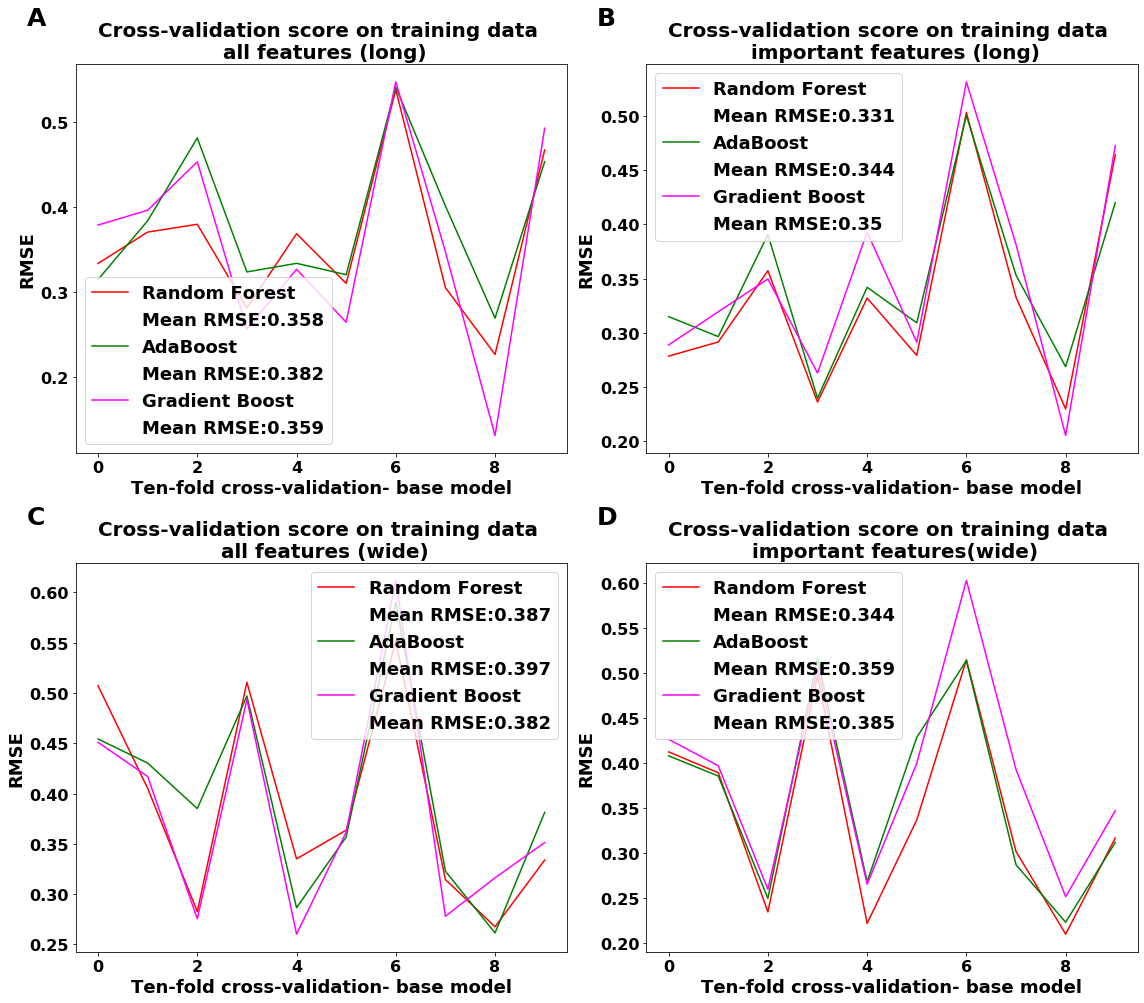

In [89]:
# Base model cross-validation training scores
for i in range(len(keys_sub)):
    scores = [value for key, value in cv_scores[0].items() if keys_sub[i] in key]
    make_plot(data = scores, xlab = "Ten-fold cross-validation- base model", 
              ylab = 'RMSE', plt_legend = fig_legend, sub_plt=i+1,
              plt_title=plot_titles_train[i], colours = colours, 
              matx_lb = "RMSE", label=i) 

##### 6.2 Tuned model RMSE scores on training data


In [90]:
check_mean(s= cv_scores_best, k = keys_sub)

full_cros
Mean : 0.354
Mean : 0.358
Mean : 0.338
imp_cros
Mean : 0.333
Mean : 0.335
Mean : 0.353
full_long
Mean : 0.389
Mean : 0.377
Mean : 0.37
imp_long
Mean : 0.346
Mean : 0.35
Mean : 0.352


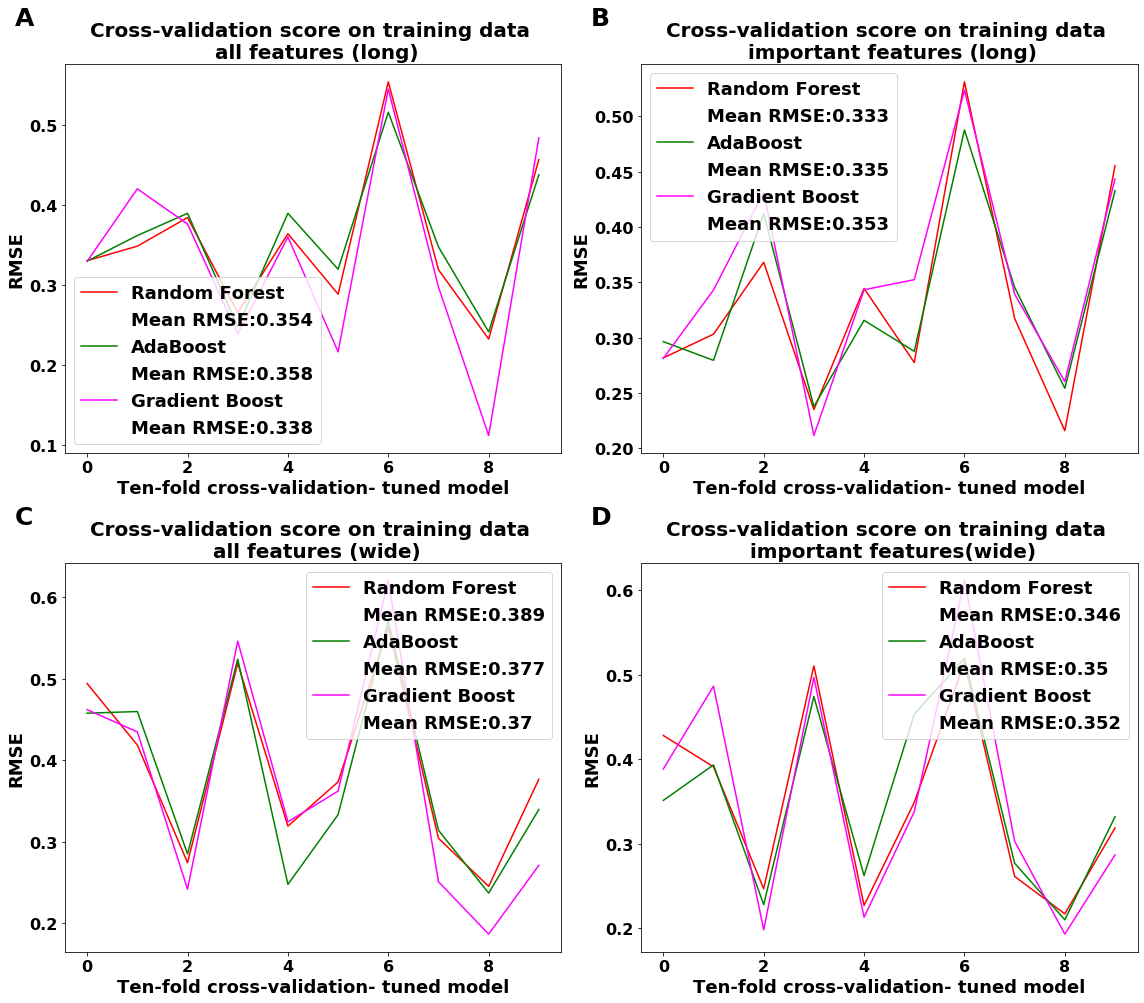

In [91]:
# Training data
# figure(num=None, figsize=(16, 14), dpi=300, facecolor='w', edgecolor='k')
for i in range(len(keys_sub)):
    scores = [value for key, value in cv_scores_best[0].items() if keys_sub[i] in key]
    make_plot(data = scores, xlab = "Ten-fold cross-validation- tuned model", 
              ylab = 'RMSE', plt_legend = fig_legend, sub_plt=i+1,
              plt_title=plot_titles_train[i], colours = colours, 
              matx_lb = "RMSE", label=i) 

##### 6.3 Base model R2 scores on training data


In [92]:
check_mean(s = cv_r2, k = keys_sub)

full_cros
Mean : 0.843
Mean : 0.828
Mean : 0.835
imp_cros
Mean : 0.867
Mean : 0.863
Mean : 0.851
full_long
Mean : 0.832
Mean : 0.825
Mean : 0.835
imp_long
Mean : 0.864
Mean : 0.853
Mean : 0.831


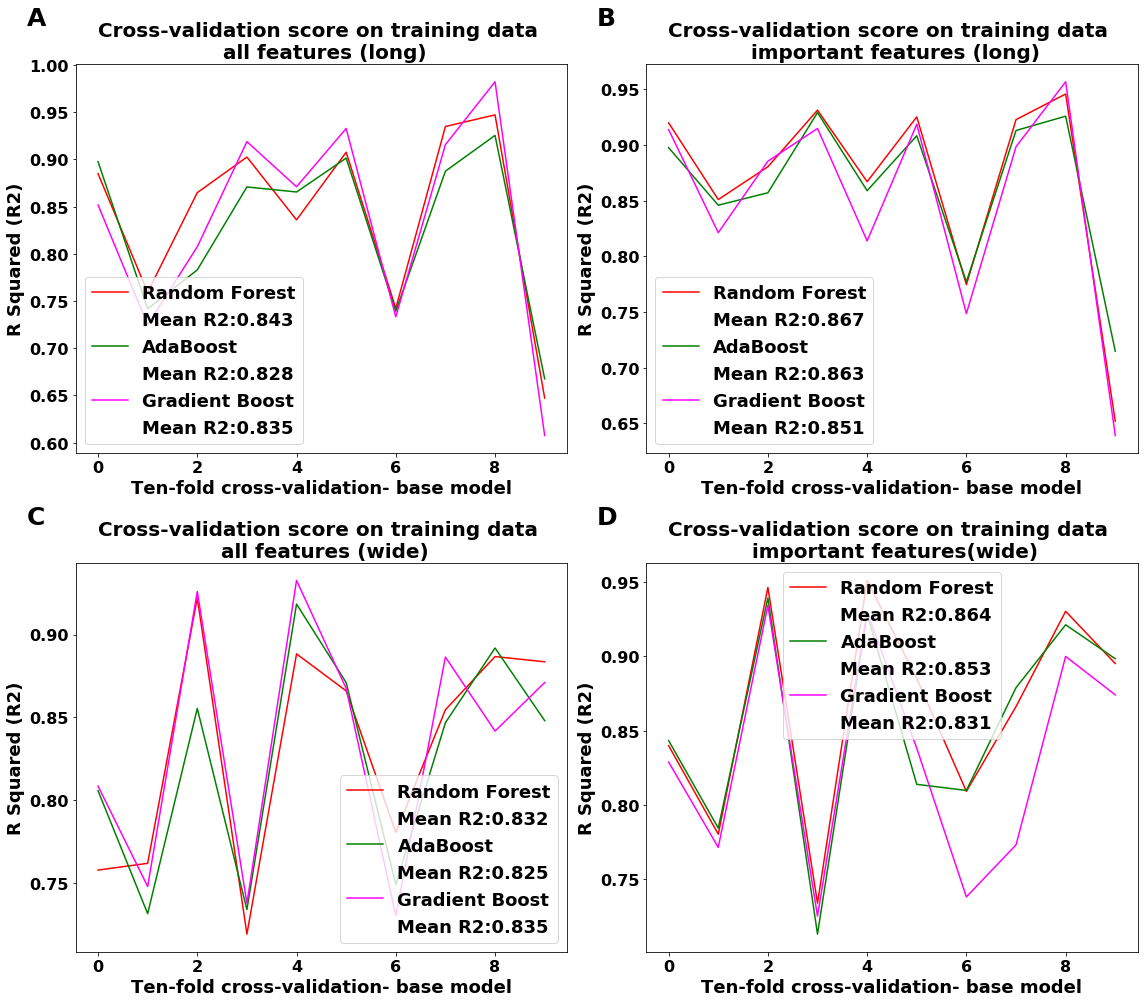

In [93]:
# Training 
# figure(num=None, figsize=(16, 14), dpi=300, facecolor='w', edgecolor='k')
for i in range(len(keys_sub)):
    scores = [value for key, value in cv_r2[0].items() if keys_sub[i] in key]
    make_plot(data = scores, xlab = "Ten-fold cross-validation- base model", 
              ylab = 'R Squared (R2)', plt_legend = fig_legend, sub_plt=i+1,
              plt_title=plot_titles_train[i], colours = colours, 
              matx_lb = "R2", label=i)

##### 6.4 Tuned model R2 scores on training data

In [94]:
check_mean(s = cv_r2_best, k=keys_sub)

full_cros
Mean : 0.847
Mean : 0.847
Mean : 0.846
imp_cros
Mean : 0.864
Mean : 0.868
Mean : 0.851
full_long
Mean : 0.83
Mean : 0.836
Mean : 0.841
imp_long
Mean : 0.862
Mean : 0.86
Mean : 0.85


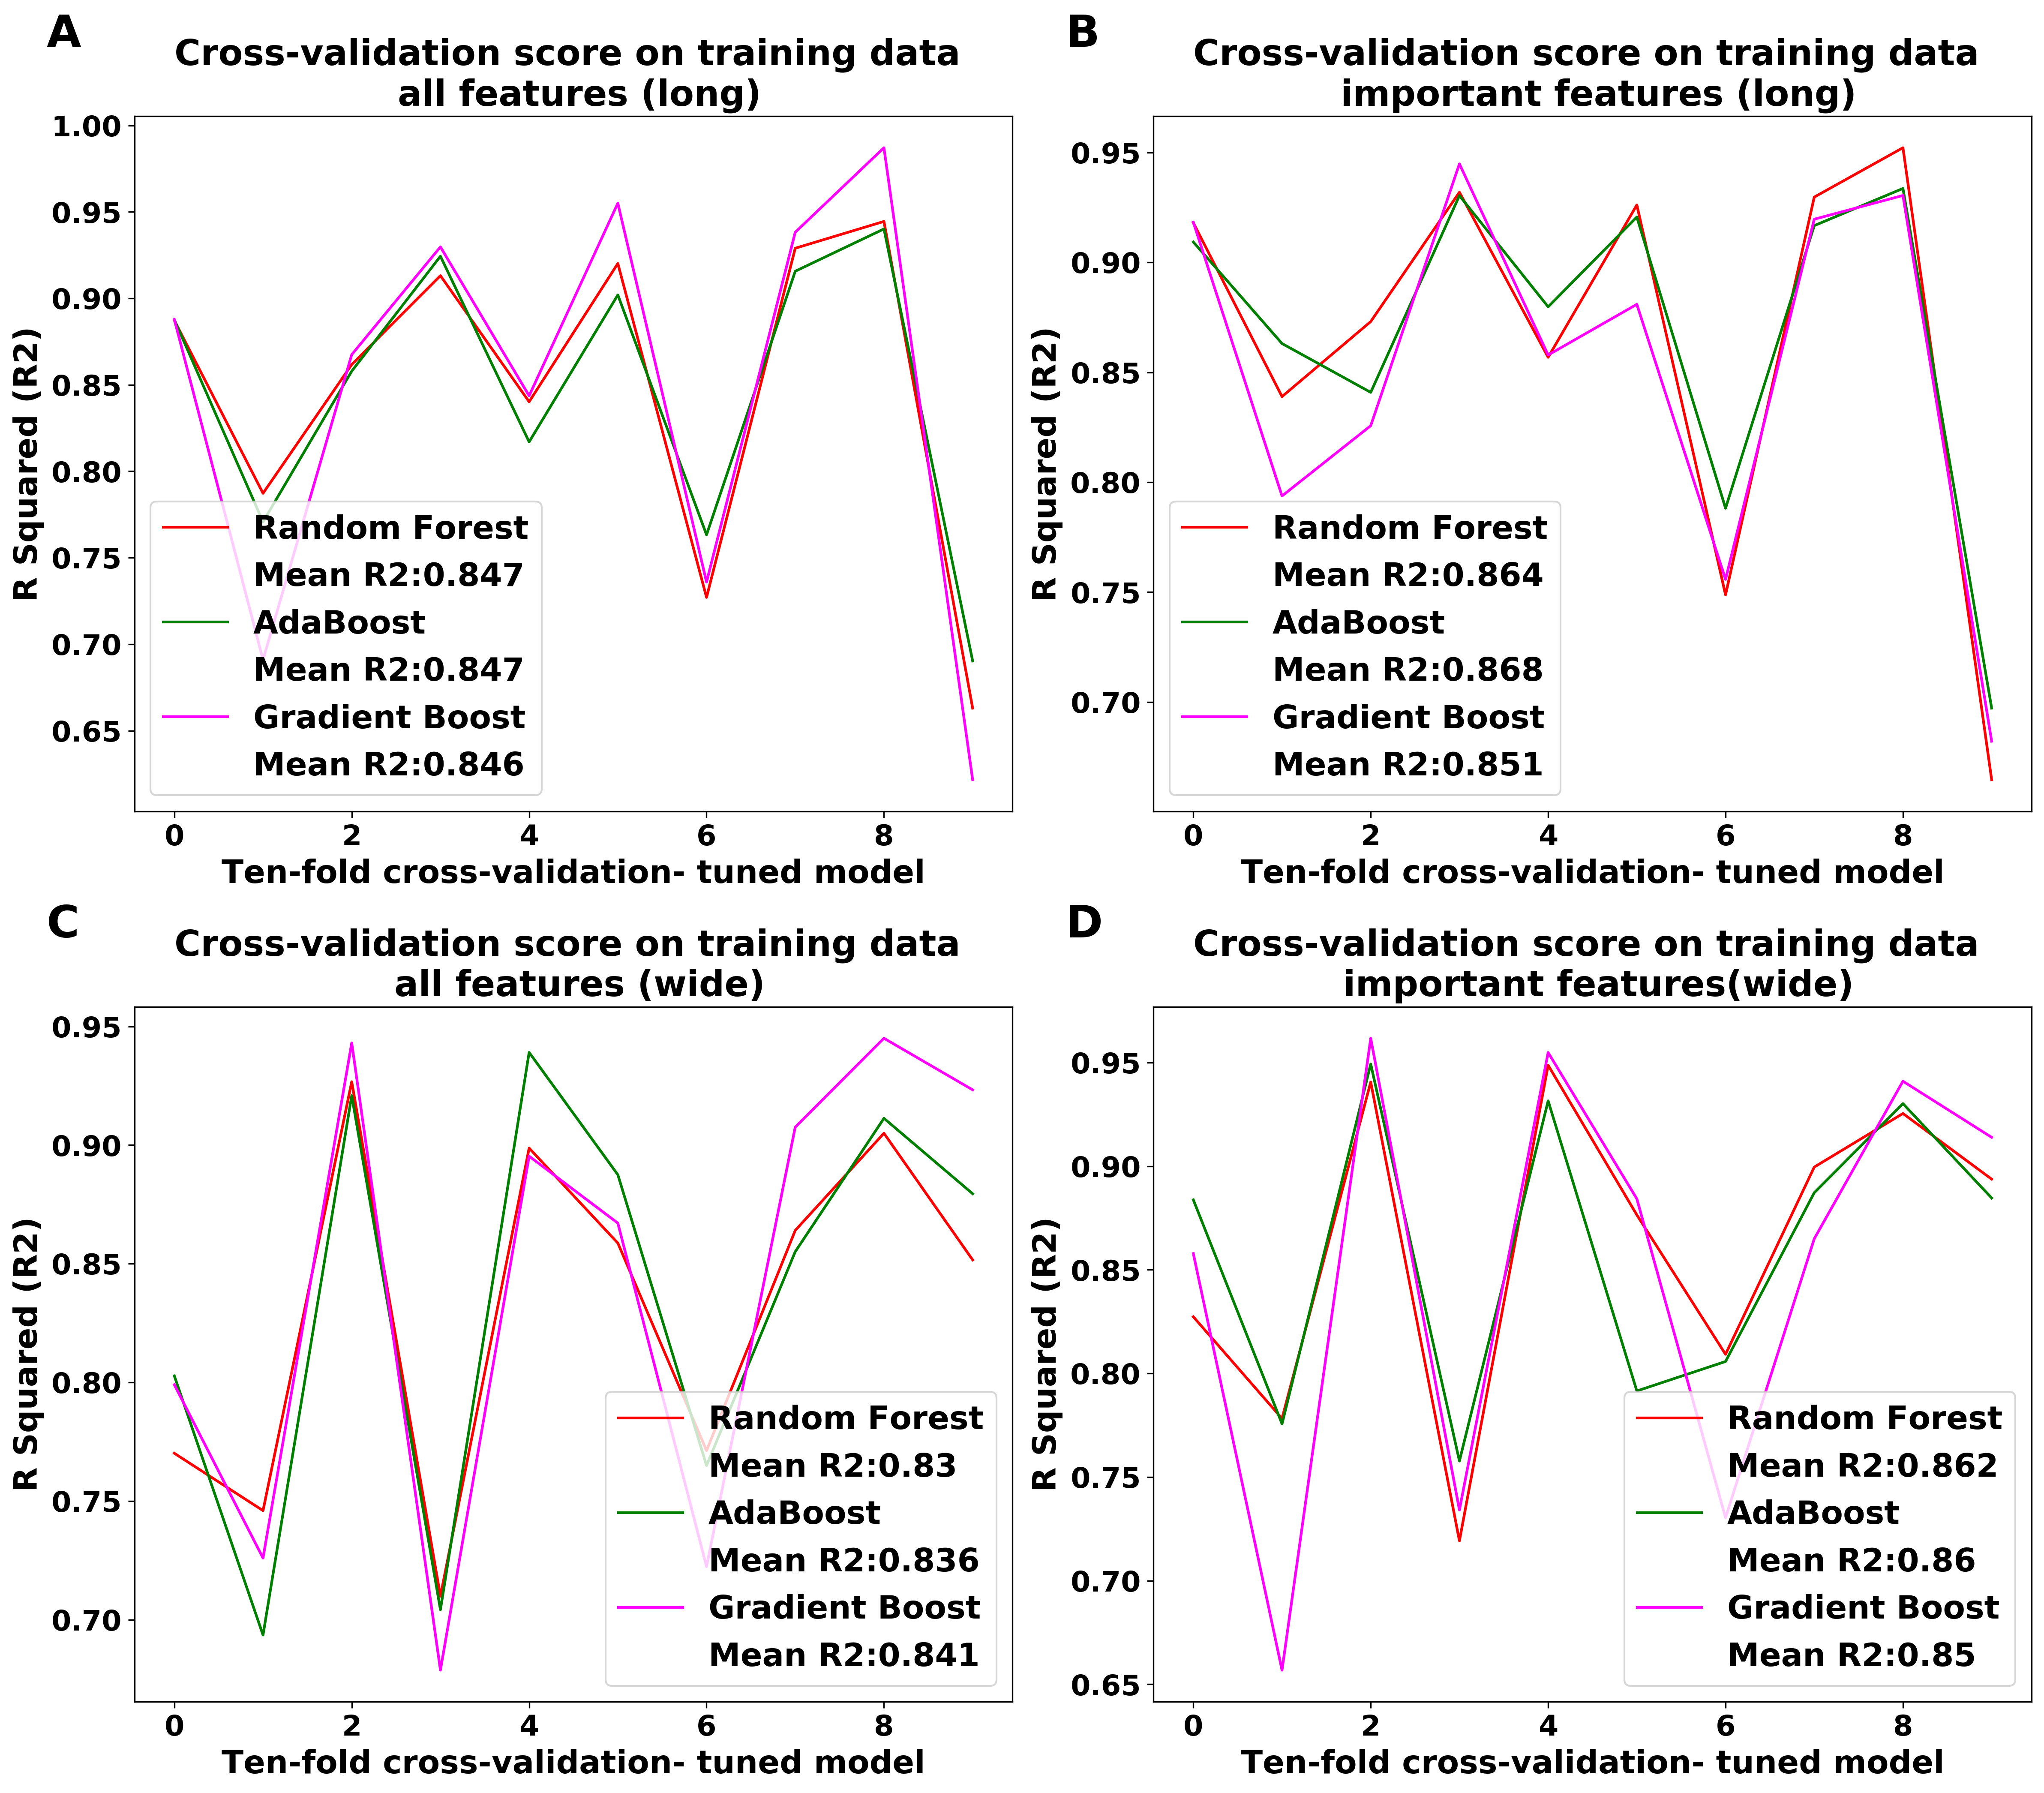

In [95]:
# R squared for train using hyperparameters
figure(num=None, figsize=(16, 14), dpi=300, facecolor='w', edgecolor='k')
for i in range(len(keys_sub)):
    scores = [value for key, value in cv_r2_best[0].items() if keys_sub[i] in key]
    make_plot(data = scores, xlab = "Ten-fold cross-validation- tuned model", 
              ylab = 'R Squared (R2)', plt_legend = fig_legend, sub_plt=i+1,
              plt_title=plot_titles_train[i], colours = colours, 
              matx_lb = "R2", label=i)

In [96]:
# Improve Model if Necessary
# Visualizing a Single Decision Tree
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [97]:
trained_models_base

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                   n_estimators=50, random_state=42),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_spli

### Tree Visualization

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1201263687, splitter='best')


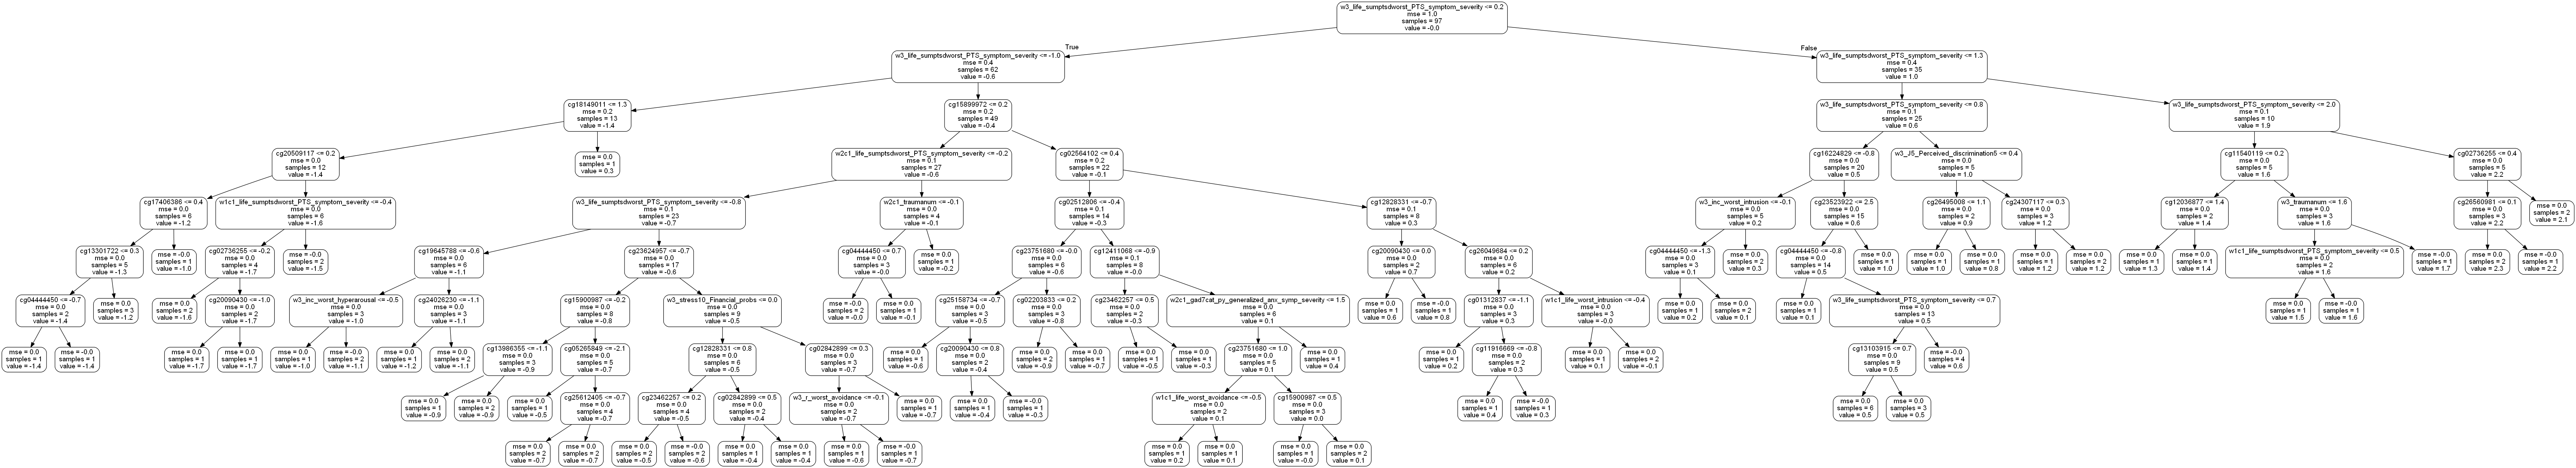

In [98]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = trained_models_base[6].estimators_[5]
print(tree)
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', 
                feature_names = pd.DataFrame(dfs_final[2]).columns, 
                rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1201263687, splitter='best')


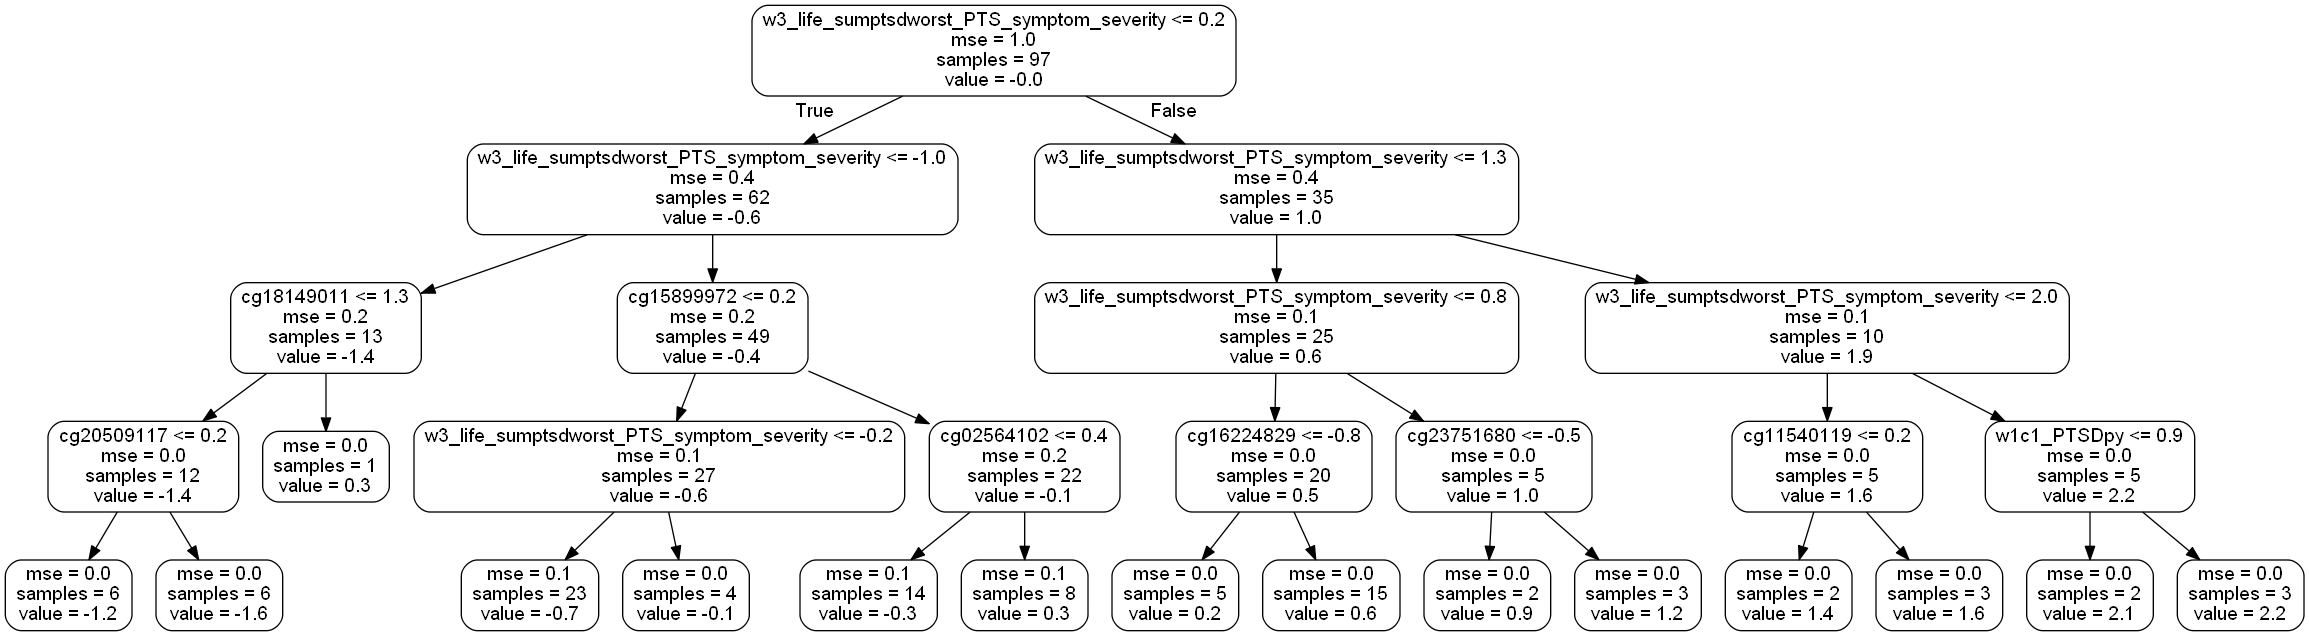

In [99]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
import pydot
def create_tree(train_features, train_labels, max_depth, 
                estimators, fig_name, features):
    file_name = fig_name +'.dot'
    rf_small = RandomForestRegressor(max_depth = max_depth, random_state=42)
    rf_small.fit(train_features, train_labels)
    # Extract the small tree
    tree_small = rf_small.estimators_[estimators]
    print(tree_small)
    # Save the tree as a png image
    export_graphviz(tree_small, out_file = file_name, 
                    feature_names = pd.DataFrame(features).columns,
                    rounded = True, precision = 1)
    (graph, ) = pydot.graph_from_dot_file(file_name)
    graph.write_png(fig_name +'.png');
    # Display in jupyter notebook
    from IPython.display import Image
    return(Image(filename = fig_name +'.png'))
    

tree_scaled = create_tree(train_features=data_scaled[2][0], train_labels=data_scaled[2][1].ravel(),
           max_depth=4, estimators=5, fig_name='Small_Tree_Random_Forest_Test_cros_full',
           features=dfs_final[2])
tree_scaled
                    


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1201263687, splitter='best')


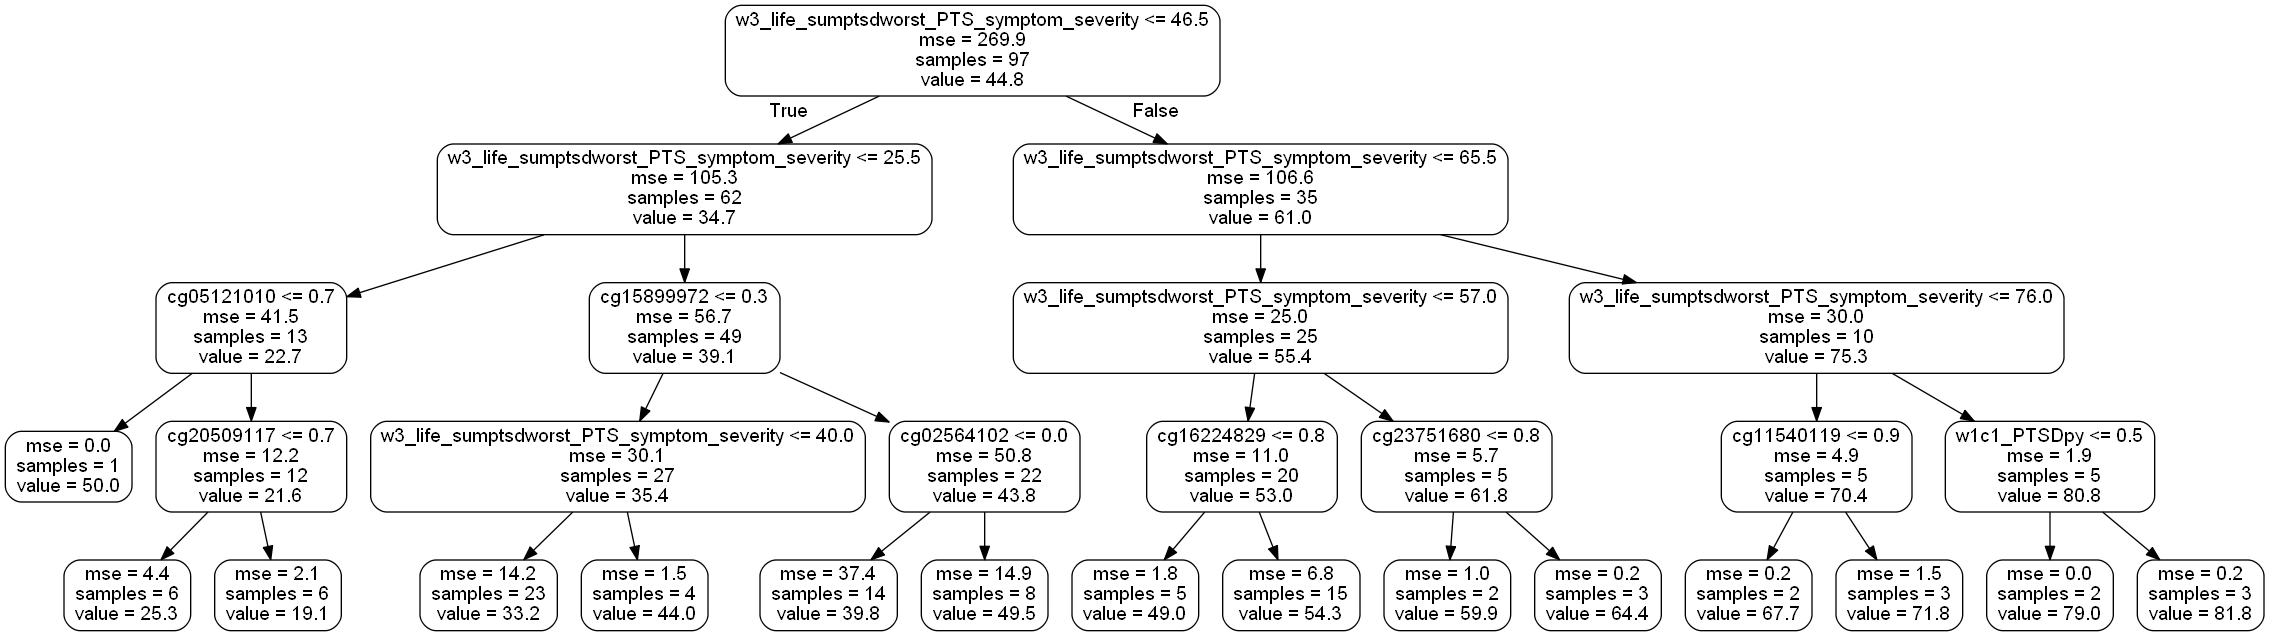

In [100]:
# Without scaling - original data
tree_scaled = create_tree(train_features=data[2][0], train_labels=data[2][1].ravel(),
           max_depth=4, estimators=5, fig_name='Small_Tree_Random_Forest_Test_cros_full_orginal',
           features=dfs_final[2])
tree_scaled

### Feature Importance
#### We will plot the import features from both full and the important set of features. 

In [101]:
# This is for the important set (100, we selected using feature selection) features
def get_feature_importance(model, feature_names):
    f_importance = model.feature_importances_
    print("Length of feature importance :", len(f_importance))
    combined = list(zip(feature_names, f_importance)) # ith column for ith importance
          
    # Using sorted and lambda 
    comb_sorted = sorted(combined, key = lambda x: x[1]) 
    return(comb_sorted)


In [290]:
trained_models_base
# dfs_final[2].columns


[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                   n_estimators=50, random_state=42),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_spli

In [103]:
# Crossectional feature importance using Random forest
# The models are in the order "full_cros", "full_long", "imp_cros", "imp_long"
# So on index 6 is random forest cross-sectional (long format)
fea_importance_cros = get_feature_importance(model=trained_models_base[6], 
                                            feature_names=dfs_final[2].columns)

fea_importance_cros

Length of feature importance : 150


[('w3_PTSDpm', 1.8502415924331358e-06),
 ('w1c1_PTSDpy', 1.8749525472941326e-06),
 ('w2c1_L1_21_drugs_alcohol', 1.9248092496355553e-06),
 ('w3_L1_28_Unemployed', 2.5959110294921796e-06),
 ('w2c1_PTSDlife', 3.2783463299201313e-06),
 ('w3_stress9_Unemployed', 3.787489433911208e-06),
 ('w3_PTSDsl', 4.121242518780082e-06),
 ('w2c1_stress6_Emotionally_mistreated', 4.860487016438624e-06),
 ('w3_stress8_Legal_problems', 6.049559801834137e-06),
 ('w2c1_L1_25_Emotionally_mistreated', 6.127989877992643e-06),
 ('w1c1_stress10_Financial_probs', 6.130984692379691e-06),
 ('w1c1_PTSDpm', 6.402794735292041e-06),
 ('w3_PTSDlife', 1.3088558049838896e-05),
 ('w3_NN2_Loneliness_Scale2', 2.6353545710317622e-05),
 ('w3_J9_Perceived_discrimination9', 2.8834230839055128e-05),
 ('w3_stress10_Financial_probs', 3.029502673696482e-05),
 ('w1c1_stress6_Emotionally_mistreated', 3.260238433502905e-05),
 ('w2c1_L1_27_Legal_problems', 3.538303551191421e-05),
 ('w2c1_stress9_Unemployed', 3.6679728568174885e-05),
 ('w3_

In [104]:
# Feature importance - longitudinal methylation and phenotype data using random forest
# So on index 9 is random forest (wide format)
fea_importance_long = get_feature_importance(model=trained_models_base[9], 
                                            feature_names=dfs_final[3].columns)
fea_importance_long

Length of feature importance : 150


[('w2c1_stress6_Emotionally_mistreated', 1.1258927748116021e-06),
 ('w3_NN2_Loneliness_Scale2', 5.260234656874035e-06),
 ('w3_PTSDsl', 6.480166183435012e-06),
 ('w3_PTSDlife', 1.0647076559856146e-05),
 ('w1c1_PTSDpy', 1.2548916720432433e-05),
 ('w1c1_PTSDlife', 1.947732810151754e-05),
 ('w3_J9_Perceived_discrimination9', 2.7702338255013412e-05),
 ('w2c1_PTSDpy', 3.1075148167889656e-05),
 ('w1c1_stress10_Financial_probs', 3.9305284637910475e-05),
 ('cg05790989_2', 4.028444530007365e-05),
 ('w2c1_gad7cat_py_generalized_anx_symp_severity', 4.3147299383499584e-05),
 ('w2c1_L1_25_Emotionally_mistreated', 4.355945092594146e-05),
 ('w2c1_inc_worst_hyperarousal', 4.7148645575923445e-05),
 ('w1c1_stress6_Emotionally_mistreated', 4.8879444514021814e-05),
 ('w1c1_L1_29_Financial_probs', 4.995249954664205e-05),
 ('w2c1_pyphq9cat_Depression_severity', 5.0772132611210236e-05),
 ('w2c1_inc_worst_avoidance', 5.6161974918343205e-05),
 ('w3_r_worst_hyperarousal', 6.550809235829837e-05),
 ('cg15322876_2'

In [105]:
trained_models_base

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                   n_estimators=50, random_state=42),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_spli

In [106]:
# We need to rename the phenotype variables
# we will save both, long and wide data into csv file and 
# edit the names and then load again for plots
def convert_to_df(info, cols):
    '''
    This function will convert a list of tuples to data frame
    input: 
    info: The information you want to convert to data frame
    cols: column names to data frame
    output: data frame
    
    '''
    df = pd.DataFrame(info, columns= cols)
    return(df)

# call function
col_names = ["Variable", "Importance"]
fea_importance_cros_df = convert_to_df(info = fea_importance_cros,
                                      cols= col_names)
fea_importance_long_df = convert_to_df(info=fea_importance_long,
                                      cols=col_names)


In [46]:
# save the files 
path = "E:/Machine Learning/Output Data/Feature Importance/"
fea_importance_cros_df.to_csv(path+"Long (cross) Importance.csv")
fea_importance_long_df.to_csv(path+"Wide Importance.csv")


### We need to rename the features in the plot. Lets load the file and rename

In [107]:
new_names = pd.read_excel(
    'E:/Machine Learning/Output Data/Feature Importance/DNHS Important Feature Names_MU.xlsx')
new_names

C:\Users\ahwani\AppData\Local\Continuum\anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


Actual Name in Dictionary                           Old Name  \
0                         female                             Gender   
1   NA (created based on trauma)                          TraumaNum   
2                     w1c1_L1_21           w1c1_L1_21_drugs_alcohol   
3                     w1c1_L1_24                w1c1_L1_24_Lost_Job   
4                     w1c1_L1_25  w1c1_L1_25_Emotionally_mistreated   
..                           ...                                ...   
66                  w3_slphq9cat   w3_slphq9cat_Depression_severity   
67                   w3_stress10        w3_stress10_Financial_probs   
68                    w3_stress8          w3_stress8_Legal_problems   
69                    w3_stress9              w3_stress9_Unemployed   
70                  w3_traumanum                       w3_traumanum   

                                      New Name  
0                                       Gender  
1             Cumulative traumatic event types  
2              W1 Parent drugs/alcohol problem  
3                                  W1 Lost Job  
4                    W1 Emotionally mistreated  
..                                         ...  
66                W3 Depression severity-PHQ-9  
67  W3 Financial problems since last interview  
68      W3 Legal problems since last interview  
69         W3 Unemployed for at least 3 months  
70                    W3 Traumatic event types  

[71 rows x 3 columns]

In [108]:

def get_new_names(df1, df2, l_on, r_on, how, n_name):
    """
    Function to merge the data so that
    we can replace the old featur names with the new names
    
    Parameters:
    df1: first data frame
    df2: second data frame
    l_on: left column name to merge on
    r_on: right column name to merge on
    how: how to merge, e.g left, inner etc
    n_name: new name column
    
    Output: will be combined data frame 

    """
    new = pd.merge(df1, df2, left_on = l_on, 
                   right_on = r_on, how = how) # merge the data
    new[n_name].fillna(new[l_on], inplace = True) # replace nas with another column
    return(new)


# function to create tuple
def create_tuple(col1, col2):
    return(list(zip(col1, col2)))
    
    

In [109]:
# long, old name cros
fea_long_new = get_new_names(df1 = fea_importance_cros_df,
                            df2 = new_names, l_on="Variable",
                            r_on="Old Name", how="left",
                            n_name="New Name")
fea_long_new_tp = create_tuple(col1 = fea_long_new["New Name"],
                               col2 = fea_long_new["Importance"])

# wide, old name long
fea_wide_new = get_new_names(df1 = fea_importance_long_df,
                            df2 = new_names, l_on="Variable",
                            r_on="Old Name", how="left",
                            n_name="New Name")
fea_wide_new_tp = create_tuple(col1 = fea_wide_new["New Name"],
                               col2 = fea_wide_new["Importance"])

In [110]:
len(fea_wide_new_tp)

150

In [111]:
fea_long_new_tp

[('W3 PTSD current', 1.8502415924331358e-06),
 ('W1 PTSD past year', 1.8749525472941326e-06),
 ('W2 Parent drugs or alcohol problem', 1.9248092496355553e-06),
 ('W3 Unemployed for atleast 3 months', 2.5959110294921796e-06),
 ('W2 PTSD lifetime', 3.2783463299201313e-06),
 ('W3 Unemployed for at least 3 months', 3.787489433911208e-06),
 ('W3 PTSD since last interview', 4.121242518780082e-06),
 ('W2 Emotionally mistreated since last interview', 4.860487016438624e-06),
 ('W3 Legal problems since last interview', 6.049559801834137e-06),
 ('W2 Emotionally mistreated', 6.127989877992643e-06),
 ('W1 Financial problems lifetime', 6.130984692379691e-06),
 ('W1 PTSD current', 6.402794735292041e-06),
 ('W3 PTSD lifetime', 1.3088558049838896e-05),
 ('W3 Loneliness-feel left out', 2.6353545710317622e-05),
 ('W3 Perceived discrimination-threatened or harassed',
  2.8834230839055128e-05),
 ('W3 Financial problems since last interview', 3.029502673696482e-05),
 ('W1 Emotionally mistreated lifetime', 3.

In [112]:
# Now check if feature importance is equal to 1
print("Importance sum long:", sum(n for _, n in fea_long_new_tp))
print("Importance sum wide :", sum(n for _, n in fea_wide_new_tp))

Importance sum long: 1.0
Importance sum wide : 1.0000000000000002


In [113]:
# Now seprate the cpgs and phenotype features
def seprate_features(top_fea, pattern):
    """
    Seprate the CpGs and phenotype features
    
    Parameters:
    ----------
    top_fea: Top features including both CpGs and phenotypes
    pattern: Pattern to search for, for example 'cg' for CpGs
    
    Output: List of CpGs and phenotypes seprately
    """
    list(filter(lambda x:pattern in x, top_fea)) 
    top_cpgs = [item for item in top_fea if item[0].startswith(pattern)]
    top_pheno = [item for item in top_fea if not item[0].startswith(pattern)]
    return([top_cpgs, top_pheno])


In [114]:
sep_fea_cros = seprate_features(top_fea=fea_long_new_tp, pattern='cg') 
print("Number of cpgs cros :", len(sep_fea_cros[0]))
print("Number of pheno cros :", len(sep_fea_cros[1]))

Number of cpgs cros : 79
Number of pheno cros : 71


In [115]:
sep_fea_cros[1]

[('W3 PTSD current', 1.8502415924331358e-06),
 ('W1 PTSD past year', 1.8749525472941326e-06),
 ('W2 Parent drugs or alcohol problem', 1.9248092496355553e-06),
 ('W3 Unemployed for atleast 3 months', 2.5959110294921796e-06),
 ('W2 PTSD lifetime', 3.2783463299201313e-06),
 ('W3 Unemployed for at least 3 months', 3.787489433911208e-06),
 ('W3 PTSD since last interview', 4.121242518780082e-06),
 ('W2 Emotionally mistreated since last interview', 4.860487016438624e-06),
 ('W3 Legal problems since last interview', 6.049559801834137e-06),
 ('W2 Emotionally mistreated', 6.127989877992643e-06),
 ('W1 Financial problems lifetime', 6.130984692379691e-06),
 ('W1 PTSD current', 6.402794735292041e-06),
 ('W3 PTSD lifetime', 1.3088558049838896e-05),
 ('W3 Loneliness-feel left out', 2.6353545710317622e-05),
 ('W3 Perceived discrimination-threatened or harassed',
  2.8834230839055128e-05),
 ('W3 Financial problems since last interview', 3.029502673696482e-05),
 ('W1 Emotionally mistreated lifetime', 3.

In [116]:
sep_fea_long = seprate_features(top_fea=fea_wide_new_tp, pattern='cg') 
print("Number of cpgs cros :", len(sep_fea_long[0]))
print("Number of pheno cros :", len(sep_fea_long[1]))

Number of cpgs cros : 99
Number of pheno cros : 51


### Plot the feature importance

In [117]:
from math import log
import matplotlib.pyplot as plt
def plot_important_fea(top_fea, xlab, ylab, color, title, long=True):
    
    """
    Plots (scatter plot) the features and their importance.
    
    Parameters:
    ----------
    top_fea: Features and importance in a list of tuple
    xlab: Label for x-axis
    ylab: Label for y-axis
    color: Colour for the plot
    title: Title of the plot
    
    Output: Plot with features on x-axis and feature importance on y-axis
    
    """
    fig = plt.figure(1, figsize=(12,18))
    top_cpg_log = [(elm1, log(elm2)) for elm1, elm2 in top_fea]
    x,y = zip(*top_cpg_log)
    if(long == True):
        plt.scatter(y,x, color = color)
        ylab = ylab + "(" + "n=" +(str(len(x))) + ")"
    else:
        plt.scatter(x,y, color = color)
        xlab = xlab + "(" + "n=" +(str(len(x))) + ")"
        
    plt.xticks(rotation = 60, ha = 'right')
    plt.xlabel(xlab, fontsize = 18, weight = 'bold')
    plt.ylabel(ylab, fontsize = 18, weight = 'bold')
    plt.xticks(fontsize = 12)
    fig.tight_layout()
#     plt.title(title, fontsize = 20)


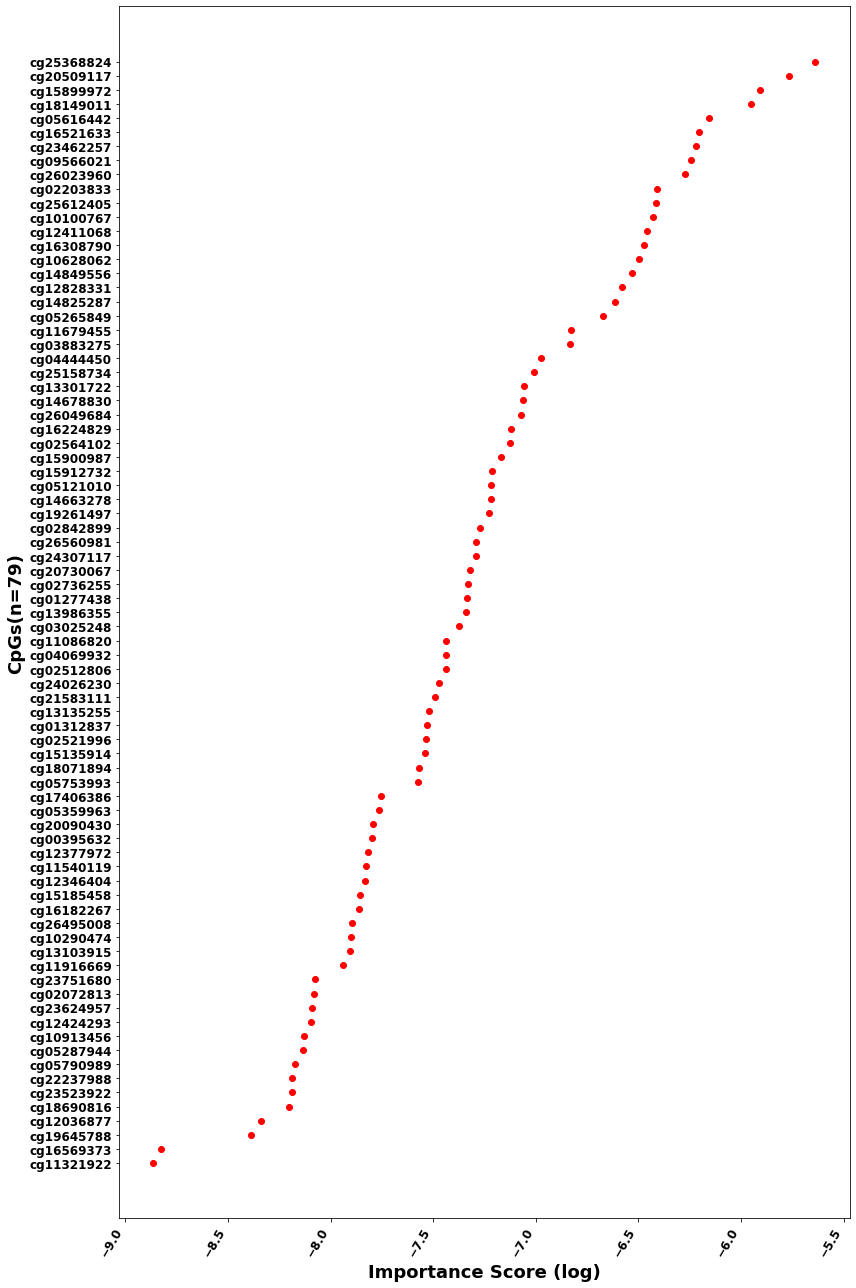

In [118]:
# This was get the biger picture of the plot from grant
# figure(num=None, figsize=(12,18), dpi=300, facecolor='w', edgecolor='k')
labs = ['CpGs', 'Phenotypes']
plot_important_fea(top_fea=sep_fea_cros[0], xlab= 'Importance Score (log)', ylab= labs[0],
                   color = 'red', title = 'Importance Score (log)', long = True)

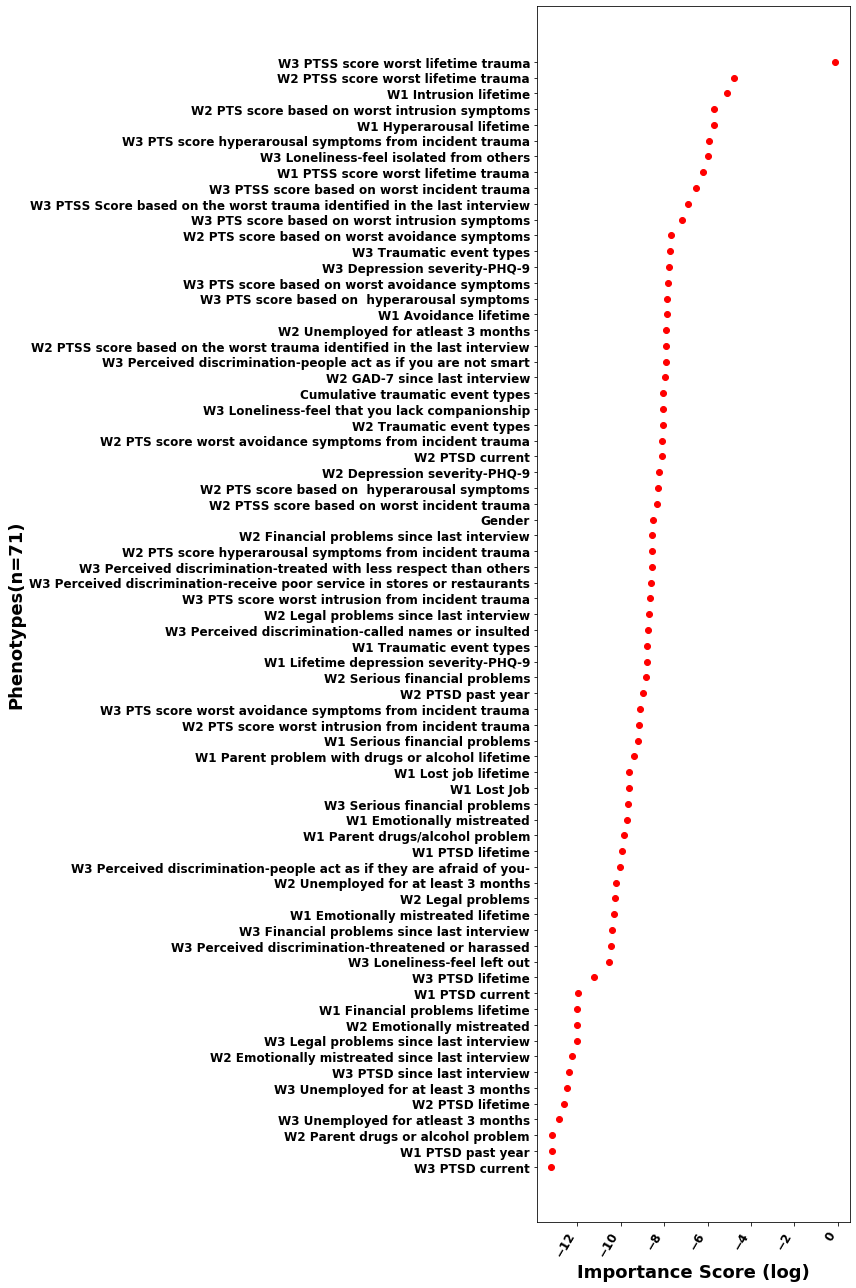

In [119]:
# This was get the biger picture of the plot from grant
# figure(num=None, figsize=(12,18), dpi=300, facecolor='w', edgecolor='k')
plot_important_fea(top_fea=sep_fea_cros[1], xlab= 'Importance Score (log)', ylab= labs[1],
                   color = 'red', title = 'Important Phenotypes')

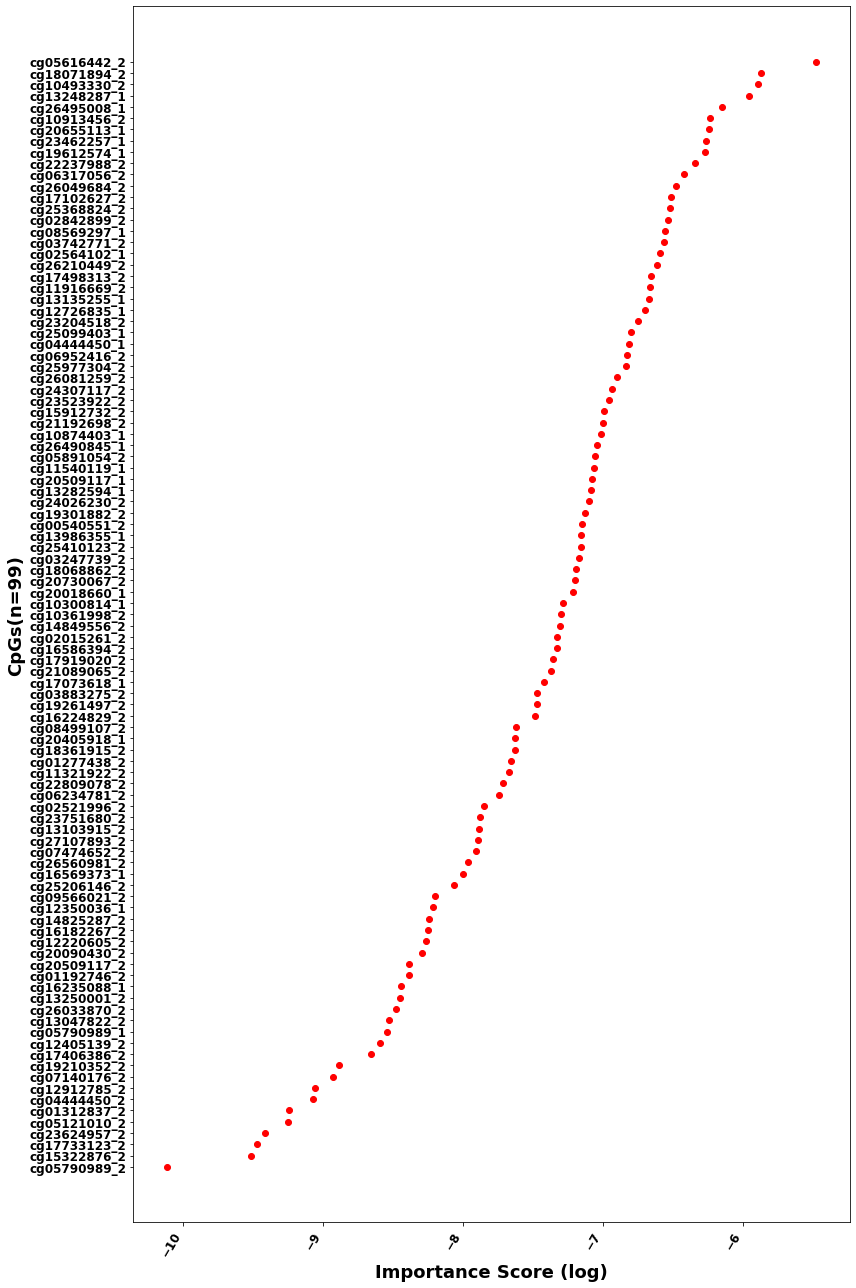

In [120]:

# figure(num=None, figsize=(12,22), dpi=300, facecolor='w', edgecolor='k')
plot_important_fea(top_fea=sep_fea_long[0], xlab= 'Importance Score (log)', ylab= labs[0],
                   color = 'red', title = 'Important CpGs')

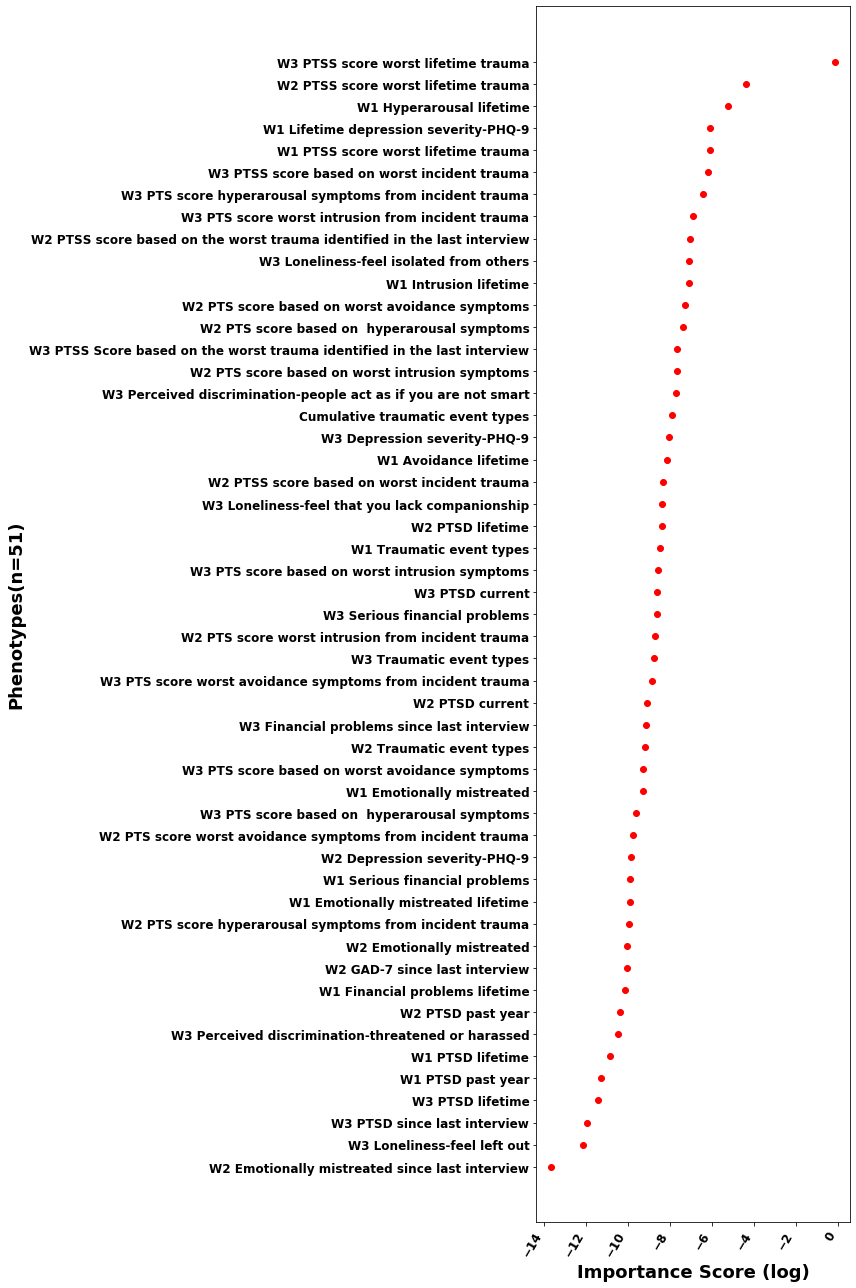

In [121]:
# This was get the biger picture of the plot from grant
# figure(num=None, figsize=(12,18), dpi=300, facecolor='w', edgecolor='k')
plot_important_fea(top_fea=sep_fea_long[1], xlab= 'Importance Score (log)', ylab= labs[1],
                   color = 'red', title = 'Important Phenotypes')

In [122]:
def create_dataframe(fea_imp):
    
    """
    convert feature importance to a data frame
    so that we can find the common features
    between two analysis (cros/long)
    
    Parameters:
    ----------
    fea_imp: Feature importance in list of tuples
    
    Output: data frame with features in the column
    
    """
    
    fea_df = pd.DataFrame(fea_imp).T
    fea_df.columns = fea_df.loc[0]
    fea_df.drop(fea_df.index[0], inplace=True)
    return(fea_df)

pd.set_option('display.float_format', lambda x: '%.6f' % x)
fea_df_cros = create_dataframe(fea_imp=fea_long_new_tp)
fea_df_long = create_dataframe(fea_imp=fea_wide_new_tp)

In [110]:
# write important features to files
n = str(dfs_final[2].shape[1]) # this is the number of top features (150 etc)
fea_df_cros.T.to_csv("E:/Machine Learning/Output Data/Epic Important features(cross-sectional) " +n+".csv")
fea_df_long.T.to_csv("E:/Machine Learning/Output Data/Epic Important features(longitudinal) " +n+" .csv")

In [123]:
print(fea_df_cros.columns)
len(fea_df_cros.columns)

Index(['W3 PTSD current', 'W1 PTSD past year',
       'W2 Parent drugs or alcohol problem',
       'W3 Unemployed for atleast 3 months', 'W2 PTSD lifetime',
       'W3 Unemployed for at least 3 months', 'W3 PTSD since last interview',
       'W2 Emotionally mistreated since last interview',
       'W3 Legal problems since last interview', 'W2 Emotionally mistreated',
       ...
       'cg18149011', 'W3 PTS score hyperarousal symptoms from incident trauma',
       'cg15899972', 'cg20509117', 'W1 Hyperarousal lifetime',
       'W2 PTS score based on worst intrusion symptoms', 'cg25368824',
       'W1 Intrusion lifetime', 'W2 PTSS score worst lifetime trauma',
       'W3 PTSS score worst lifetime trauma'],
      dtype='object', name=0, length=150)


150

In [124]:
print(fea_df_long.columns)
len(fea_df_long.columns)

Index(['W2 Emotionally mistreated since last interview',
       'W3 Loneliness-feel left out', 'W3 PTSD since last interview',
       'W3 PTSD lifetime', 'W1 PTSD past year', 'W1 PTSD lifetime',
       'W3 Perceived discrimination-threatened or harassed',
       'W2 PTSD past year', 'W1 Financial problems lifetime', 'cg05790989_2',
       ...
       'cg26495008_1', 'W1 PTSS score worst lifetime trauma',
       'W1 Lifetime depression severity-PHQ-9', 'cg13248287_1', 'cg10493330_2',
       'cg18071894_2', 'cg05616442_2', 'W1 Hyperarousal lifetime',
       'W2 PTSS score worst lifetime trauma',
       'W3 PTSS score worst lifetime trauma'],
      dtype='object', name=0, length=150)


150

In [48]:
# Now we need get the phenotype variables in both long and wide
# We need unique varibles from both (we need to add more names to phenotypes in plot)

# function to combine the features
def combine_features(f1, f2):
    f = f1.append(f2, sort=True)
    return(f)

# get all phenotypes, removing cpgs
def get_unique_pheno(f, col_names= None):
    x = f.loc[:, ~f.columns.str.contains('^cg')] # drop cpgs
    x = x.T
    if(col_names != None):
        x.columns = col_names
    return(x)


In [99]:
comb_fea =  combine_features(f1 = fea_df_cros,f2 = fea_df_long)
comb_uniq = get_unique_pheno(f = comb_fea, col_names= ['long', 'wide'])
comb_uniq.to_csv("E:/Machine Learning/Output Data/Feature Importance/Unique_combined_Pheno.csv")

In [125]:
#interesting this cpgs is present in cross-sectional as well as both measurements of longitudinal
# Supress scientific notation
print(fea_df_cros['cg20509117'])
print(fea_df_long['cg20509117_1'])
print(fea_df_long['cg20509117_2'])

1   0.003129
Name: cg20509117, dtype: object
1   0.000842
Name: cg20509117_1, dtype: object
1   0.000228
Name: cg20509117_2, dtype: object


In [126]:
fea_df_long

0 W2 Emotionally mistreated since last interview W3 Loneliness-feel left out  \
1                                       0.000001                    0.000005   

0 W3 PTSD since last interview W3 PTSD lifetime W1 PTSD past year  \
1                     0.000006         0.000011          0.000013   

0 W1 PTSD lifetime W3 Perceived discrimination-threatened or harassed  \
1         0.000019                                           0.000028   

0 W2 PTSD past year W1 Financial problems lifetime cg05790989_2  \
1          0.000031                       0.000039     0.000040   

0 W2 GAD-7 since last interview W2 Emotionally mistreated  \
1                      0.000043                  0.000044   

0 W2 PTS score hyperarousal symptoms from incident trauma  \
1                                           0.000047        

0 W1 Emotionally mistreated lifetime W1 Serious financial problems  \
1                           0.000049                      0.000050   

0 W2 Depression severity-PHQ-9  \
1                     0.000051   

0 W2 PTS score worst avoidance symptoms from incident trauma  \
1                                           0.000056           

0 W3 PTS score based on  hyperarousal symptoms cg15322876_2 cg17733123_2  \
1                                     0.000066     0.000073     0.000077   

0 cg23624957_2 W1 Emotionally mistreated  \
1     0.000082                  0.000091   

0 W3 PTS score based on worst avoidance symptoms cg05121010_2 cg01312837_2  \
1                                       0.000092     0.000096     0.000097   

0 W2 Traumatic event types W3 Financial problems since last interview  \
1                 0.000103                                   0.000108   

0 W2 PTSD current cg04444450_2 cg12912785_2 cg07140176_2 cg19210352_2  \
1        0.000110     0.000115     0.000116     0.000132     0.000138   

0 W3 PTS score worst avoidance symptoms from incident trauma  \
1                                           0.000143           

0 W3 Traumatic event types W2 PTS score worst intrusion from incident trauma  \
1                 0.000158                                          0.000166   

0 cg17406386_2 W3 Serious financial problems W3 PTSD current cg12405139_2  \
1     0.000173                      0.000175        0.000176     0.000185   

0 W3 PTS score based on worst intrusion symptoms cg05790989_1 cg13047822_2  \
1                                       0.000186     0.000195     0.000198   

0 W1 Traumatic event types cg26033870_2 cg13250001_2 cg16235088_1  \
1                 0.000207     0.000207     0.000214     0.000215   

0 cg01192746_2 cg20509117_2 W2 PTSD lifetime  \
1     0.000227     0.000228         0.000229   

0 W3 Loneliness-feel that you lack companionship  \
1                                       0.000232   

0 W2 PTSS score based on worst incident trauma cg20090430_2 cg12220605_2  \
1                                     0.000237     0.000249     0.000258   

0 cg16182267_2 cg14825287_2 cg12350036_1 cg09566021_2 W1 Avoidance lifetime  \
1     0.000261     0.000263     0.000271     0.000274              0.000283   

0 cg25206146_2 W3 Depression severity-PHQ-9 cg16569373_1 cg26560981_2  \
1     0.000314                     0.000316     0.000335     0.000346   

0 Cumulative traumatic event types cg07474652_2 cg27107893_2 cg13103915_2  \
1                         0.000363     0.000368     0.000374     0.000376   

0 cg23751680_2 cg02521996_2 cg06234781_2 cg22809078_2  \
1     0.000379     0.000390     0.000432     0.000446   

0 W3 Perceived discrimination-people act as if you are not smart cg11321922_2  \
1                                           0.000453                 0.000463   

0 W2 PTS score based on worst intrusion symptoms cg01277438_2  \
1                                       0.000466     0.000470   

0 W3 PTSS Score based on the worst trauma identified in the last interview  \
1                                           0.000475                         

0 cg18361915_2 cg

In [127]:
fea_df_cros

0 W3 PTSD current W1 PTSD past year W2 Parent drugs or alcohol problem  \
1        0.000002          0.000002                           0.000002   

0 W3 Unemployed for atleast 3 months W2 PTSD lifetime  \
1                           0.000003         0.000003   

0 W3 Unemployed for at least 3 months W3 PTSD since last interview  \
1                            0.000004                     0.000004   

0 W2 Emotionally mistreated since last interview  \
1                                       0.000005   

0 W3 Legal problems since last interview W2 Emotionally mistreated  \
1                               0.000006                  0.000006   

0 W1 Financial problems lifetime W1 PTSD current W3 PTSD lifetime  \
1                       0.000006        0.000006         0.000013   

0 W3 Loneliness-feel left out  \
1                    0.000026   

0 W3 Perceived discrimination-threatened or harassed  \
1                                           0.000029   

0 W3 Financial problems since last interview  \
1                                   0.000030   

0 W1 Emotionally mistreated lifetime W2 Legal problems  \
1                           0.000033          0.000035   

0 W2 Unemployed for at least 3 months  \
1                            0.000037   

0 W3 Perceived discrimination-people act as if they are afraid of you-  \
1                                           0.000044                     

0 W1 PTSD lifetime W1 Parent drugs/alcohol problem W1 Emotionally mistreated  \
1         0.000049                        0.000052                  0.000061   

0 W3 Serious financial problems W1 Lost Job W1 Lost job lifetime  \
1                      0.000063    0.000065             0.000066   

0 W1 Parent problem with drugs or alcohol lifetime  \
1                                         0.000084   

0 W1 Serious financial problems  \
1                      0.000100   

0 W2 PTS score worst intrusion from incident trauma  \
1                                          0.000107   

0 W3 PTS score worst avoidance symptoms from incident trauma  \
1                                           0.000111           

0 W2 PTSD past year cg11321922 W2 Serious financial problems cg16569373  \
1          0.000124   0.000141                      0.000143   0.000147   

0 W1 Lifetime depression severity-PHQ-9 W1 Traumatic event types  \
1                              0.000150                 0.000153   

0 W3 Perceived discrimination-called names or insulted  \
1                                           0.000162     

0 W2 Legal problems since last interview  \
1                               0.000170   

0 W3 PTS score worst intrusion from incident trauma  \
1                                          0.000176   

0 W3 Perceived discrimination-receive poor service in stores or restaurants  \
1                                           0.000182                          

0 W3 Perceived discrimination-treated with less respect than others  \
1                                           0.000187                  

0 W2 PTS score hyperarousal symptoms from incident trauma  \
1                                           0.000188        

0 W2 Financial problems since last interview   Gender cg19645788  \
1                                   0.000195 0.000198   0.000227   

0 W2 PTSS score based on worst incident trauma cg12036877  \
1                                     0.000237   0.000239   

0 W2 PTS score based on  hyperarousal symptoms W2 Depression severity-PHQ-9  \
1                                     0.000250                     0.000263   

0 cg18690816 cg23523922 cg22237988 cg05790989 cg05287944 cg10913456  \
1   0.000274   0.000277   0.000278   0.000283   0.000294   0.000295   

0 W2 PTSD current W2 PTS score worst avoidance symptoms from incident trauma  \
1        0.000301                                           0.000305           

0 cg12424293 cg23624957 cg02072813 cg23751680 W2 Traumatic event types  \
1   0.000305   0.000306   0.000310   0.

In [128]:
# Common from cross-sectional that are in longitudinal as well
# The order is important here, checking cros in long
# because long have _1/_2 (wave info) with the cpgs
common_features = fea_df_long.loc[:,fea_df_long.columns.str.contains('|'.join(fea_df_cros.columns))]
common_features.columns


Index(['W2 Emotionally mistreated since last interview',
       'W3 Loneliness-feel left out', 'W3 PTSD since last interview',
       'W3 PTSD lifetime', 'W1 PTSD past year', 'W1 PTSD lifetime',
       'W3 Perceived discrimination-threatened or harassed',
       'W2 PTSD past year', 'W1 Financial problems lifetime', 'cg05790989_2',
       'W2 GAD-7 since last interview', 'W2 Emotionally mistreated',
       'W2 PTS score hyperarousal symptoms from incident trauma',
       'W1 Emotionally mistreated lifetime', 'W1 Serious financial problems',
       'W2 Depression severity-PHQ-9',
       'W2 PTS score worst avoidance symptoms from incident trauma',
       'W3 PTS score based on  hyperarousal symptoms', 'cg23624957_2',
       'W1 Emotionally mistreated',
       'W3 PTS score based on worst avoidance symptoms', 'cg05121010_2',
       'cg01312837_2', 'W2 Traumatic event types',
       'W3 Financial problems since last interview', 'W2 PTSD current',
       'cg04444450_2',
       'W3 PTS scor

In [129]:
fea_df_long.columns

Index(['W2 Emotionally mistreated since last interview',
       'W3 Loneliness-feel left out', 'W3 PTSD since last interview',
       'W3 PTSD lifetime', 'W1 PTSD past year', 'W1 PTSD lifetime',
       'W3 Perceived discrimination-threatened or harassed',
       'W2 PTSD past year', 'W1 Financial problems lifetime', 'cg05790989_2',
       ...
       'cg26495008_1', 'W1 PTSS score worst lifetime trauma',
       'W1 Lifetime depression severity-PHQ-9', 'cg13248287_1', 'cg10493330_2',
       'cg18071894_2', 'cg05616442_2', 'W1 Hyperarousal lifetime',
       'W2 PTSS score worst lifetime trauma',
       'W3 PTSS score worst lifetime trauma'],
      dtype='object', name=0, length=150)

In [130]:
# As we have subscripts for longitudinal cpgs, we will remove them
import re
pattern = ["_1$", "_2$"]
common_features = common_features.rename(columns=lambda x: re.sub('|'.join(pattern), '', x))
common_features.columns
common_features

0 W2 Emotionally mistreated since last interview W3 Loneliness-feel left out  \
1                                       0.000001                    0.000005   

0 W3 PTSD since last interview W3 PTSD lifetime W1 PTSD past year  \
1                     0.000006         0.000011          0.000013   

0 W1 PTSD lifetime W3 Perceived discrimination-threatened or harassed  \
1         0.000019                                           0.000028   

0 W2 PTSD past year W1 Financial problems lifetime cg05790989  \
1          0.000031                       0.000039   0.000040   

0 W2 GAD-7 since last interview W2 Emotionally mistreated  \
1                      0.000043                  0.000044   

0 W2 PTS score hyperarousal symptoms from incident trauma  \
1                                           0.000047        

0 W1 Emotionally mistreated lifetime W1 Serious financial problems  \
1                           0.000049                      0.000050   

0 W2 Depression severity-PHQ-9  \
1                     0.000051   

0 W2 PTS score worst avoidance symptoms from incident trauma  \
1                                           0.000056           

0 W3 PTS score based on  hyperarousal symptoms cg23624957  \
1                                     0.000066   0.000082   

0 W1 Emotionally mistreated W3 PTS score based on worst avoidance symptoms  \
1                  0.000091                                       0.000092   

0 cg05121010 cg01312837 W2 Traumatic event types  \
1   0.000096   0.000097                 0.000103   

0 W3 Financial problems since last interview W2 PTSD current cg04444450  \
1                                   0.000108        0.000110   0.000115   

0 W3 PTS score worst avoidance symptoms from incident trauma  \
1                                           0.000143           

0 W3 Traumatic event types W2 PTS score worst intrusion from incident trauma  \
1                 0.000158                                          0.000166   

0 cg17406386 W3 Serious financial problems W3 PTSD current  \
1   0.000173                      0.000175        0.000176   

0 W3 PTS score based on worst intrusion symptoms cg05790989  \
1                                       0.000186   0.000195   

0 W1 Traumatic event types cg20509117 W2 PTSD lifetime  \
1                 0.000207   0.000228         0.000229   

0 W3 Loneliness-feel that you lack companionship  \
1                                       0.000232   

0 W2 PTSS score based on worst incident trauma cg20090430 cg16182267  \
1                                     0.000237   0.000249   0.000261   

0 cg14825287 cg09566021 W1 Avoidance lifetime W3 Depression severity-PHQ-9  \
1   0.000263   0.000274              0.000283                     0.000316   

0 cg16569373 cg26560981 Cumulative traumatic event types cg13103915  \
1   0.000335   0.000346                         0.000363   0.000376   

0 cg23751680 cg02521996  \
1   0.000379   0.000390   

0 W3 Perceived discrimination-people act as if you are not smart cg11321922  \
1                                           0.000453               0.000463   

0 W2 PTS score based on worst intrusion symptoms cg01277438  \
1                                       0.000466   0.000470   

0 W3 PTSS Score based on the worst trauma identified in the last interview  \
1                                           0.000475                         

0 cg16224829 cg19261497 cg03883275  \
1   0.000559   0.000568   0.000569   

0 W2 PTS score based on  hyperarousal symptoms  \
1                                     0.000621   

0 W2 PTS score based on worst avoidance symptoms cg14849556 cg20730067  \
1                                       0.000666   0.000670   0.000743   

0 cg13986355 cg24026230 W1 Intrusion lifetime  \
1   0.000777   0.000825              0.000829   

0 W3 Loneliness-feel isolated from others cg20509117 cg11540119  \
1                                0.000838   0.000842   0.000856   

0 W2 PTSS score based on the wors

In [131]:
common_features.T

1
0                                                      
W2 Emotionally mistreated since last interview 0.000001
W3 Loneliness-feel left out                    0.000005
W3 PTSD since last interview                   0.000006
W3 PTSD lifetime                               0.000011
W1 PTSD past year                              0.000013
...                                                 ...
cg18071894                                     0.002806
cg05616442                                     0.004177
W1 Hyperarousal lifetime                       0.005193
W2 PTSS score worst lifetime trauma            0.012572
W3 PTSS score worst lifetime trauma            0.882080

[95 rows x 1 columns]

In [132]:
fea_df_cros.T

1
0                                                      
W3 PTSD current                                0.000002
W1 PTSD past year                              0.000002
W2 Parent drugs or alcohol problem             0.000002
W3 Unemployed for atleast 3 months             0.000003
W2 PTSD lifetime                               0.000003
...                                                 ...
W2 PTS score based on worst intrusion symptoms 0.003358
cg25368824                                     0.003563
W1 Intrusion lifetime                          0.006026
W2 PTSS score worst lifetime trauma            0.008550
W3 PTSS score worst lifetime trauma            0.890103

[150 rows x 1 columns]

In [133]:
# get the common features seprate
common_cpgs = common_features.loc[:, common_features.columns.str.contains('^cg')].T
common_pheno = common_features.loc[:, ~common_features.columns.str.contains('^cg')].T

print("Common Cpgs :", len(common_cpgs))
print("Common Phenotypes :", len(common_pheno))
common_cpgs

Common Cpgs : 44
Common Phenotypes : 51


1
0                  
cg05790989 0.000040
cg23624957 0.000082
cg05121010 0.000096
cg01312837 0.000097
cg04444450 0.000115
cg17406386 0.000173
cg05790989 0.000195
cg20509117 0.000228
cg20090430 0.000249
cg16182267 0.000261
cg14825287 0.000263
cg09566021 0.000274
cg16569373 0.000335
cg26560981 0.000346
cg13103915 0.000376
cg23751680 0.000379
cg02521996 0.000390
cg11321922 0.000463
cg01277438 0.000470
cg16224829 0.000559
cg19261497 0.000568
cg03883275 0.000569
cg14849556 0.000670
cg20730067 0.000743
cg13986355 0.000777
cg24026230 0.000825
cg20509117 0.000842
cg11540119 0.000856
cg15912732 0.000913
cg23523922 0.000951
cg24307117 0.000969
cg04444450 0.001099
cg13135255 0.001265
cg11916669 0.001273
cg02564102 0.001369
cg02842899 0.001444
cg25368824 0.001470
cg26049684 0.001532
cg22237988 0.001750
cg23462257 0.001897
cg10913456 0.001958
cg26495008 0.002126
cg18071894 0.002806
cg05616442 0.004177

In [134]:
both_common = pd.merge(common_cpgs, fea_df_cros.T, left_index=True, right_index=True, how='inner')
both_common.columns = ['Wide Importance','Long Importance']
both_common.sort_values('Long Importance', inplace = True)
both_common

Wide Importance Long Importance
0                                         
cg11321922        0.000463        0.000141
cg16569373        0.000335        0.000147
cg23523922        0.000951        0.000277
cg22237988        0.001750        0.000278
cg05790989        0.000040        0.000283
cg05790989        0.000195        0.000283
cg10913456        0.001958        0.000295
cg23624957        0.000082        0.000306
cg23751680        0.000379        0.000311
cg11916669        0.001273        0.000357
cg13103915        0.000376        0.000368
cg26495008        0.002126        0.000373
cg16182267        0.000261        0.000386
cg11540119        0.000856        0.000398
cg20090430        0.000249        0.000413
cg17406386        0.000173        0.000429
cg18071894        0.002806        0.000515
cg02521996        0.000390        0.000533
cg01312837        0.000097        0.000536
cg13135255        0.001265        0.000541
cg24026230        0.000825        0.000568
cg13986355        0.000777        0.000650
cg01277438        0.000470        0.000651
cg20730067        0.000743        0.000661
cg24307117        0.000969        0.000681
cg26560981        0.000346        0.000683
cg02842899        0.001444        0.000694
cg19261497        0.000568        0.000728
cg05121010        0.000096        0.000735
cg15912732        0.000913        0.000735
cg02564102        0.001369        0.000805
cg16224829        0.000559        0.000809
cg26049684        0.001532        0.000848
cg04444450        0.001099        0.000937
cg04444450        0.000115        0.000937
cg03883275        0.000569        0.001076
cg14825287        0.000263        0.001343
cg14849556        0.000670        0.001456
cg09566021        0.000274        0.001942
cg23462257        0.001897        0.001989
cg05616442        0.004177        0.002123
cg20509117        0.000842        0.003129
cg20509117        0.000228        0.003129
cg25368824        0.001470        0.003563

In [135]:
# Annotation of significant cpgs
manifest1 = joblib.load("E:/Machine Learning/Output Data/Pre-processed Epic Manifest.pkl")

In [136]:
common_annot =  manifest1.loc[manifest1['IlmnID'].isin(common_cpgs.index)]
common_annot = common_annot[['IlmnID', 'UCSC_RefGene_Name']]
common_final = pd.merge(common_annot, both_common, left_on='IlmnID', right_index=True, how='inner')
common_final = common_final.sort_values(by=['Wide Importance','Long Importance'], ascending = False)
print(common_final.shape)
common_final

(44, 4)


IlmnID                                  UCSC_RefGene_Name  \
552016  cg05616442                                     AKT1;AKT1;AKT1   
11053   cg18071894                                     AKT1;AKT1;AKT1   
610646  cg26495008                            FKBP5;FKBP5;FKBP5;FKBP5   
32385   cg10913456          FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5   
597111  cg23462257                                        NFKB1;NFKB1   
523488  cg22237988                                    BAX;BAX;BAX;BAX   
583447  cg26049684                                     AKT1;AKT1;AKT1   
569912  cg25368824                                            IL4;IL4   
664420  cg02842899           TP53;WRAP53;WRAP53;TP53;WRAP53;TP53;TP53   
484387  cg02564102                                            SMARCC1   
695402  cg11916669                                     AKT1;AKT1;AKT1   
797896  cg13135255                                      CREBBP;CREBBP   
739273  cg04444450                                              NCOA2   
101260  cg24307117                                          SPI1;SPI1   
787897  cg23523922                                                AFP   
272336  cg15912732                                     AKT1;AKT1;AKT1   
852645  cg11540119                                            SMARCC1   
124828  cg20509117                                      IL6;LOC541472   
701192  cg24026230                            NR3C1;NR3C1;NR3C1;NR3C1   
287974  cg13986355                                     AKT1;AKT1;AKT1   
711855  cg20730067                                        NFKB1;NFKB1   
480560  cg14849556                                  NCOA1;NCOA1;NCOA1   
829380  cg03883275                            MAPK8;MAPK8;MAPK8;MAPK8   
179647  cg19261497                           MDM2;MDM2;MDM2;MDM2;MDM2   
648599  cg16224829                                  NR3C1;NR3C1;NR3C1   
561155  cg01277438                               NFATC1;NFATC1;NFATC1   
154633  cg11321922  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...   
472330  cg02521996                                  MAPK3;MAPK3;MAPK3   
860522  cg23751680  SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA...   
159303  cg13103915                                               CSF2   
295863  cg26560981                               MAPK10;MAPK10;MAPK10   
532135  cg16569373                                      CREBBP;CREBBP   
7183    cg09566021                                      CREBBP;CREBBP   
822972  cg14825287                                     AKT1;AKT1;AKT1   
179209  cg16182267                        NFATC1;NFATC1;NFATC1;NFATC1   
481289  cg20090430                                        GSK3B;GSK3B   
124828  cg20509117                                      IL6;LOC541472   
235877  cg05790989                                             POU2F1   
49170   cg17406386  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...   
739273  cg04444450                                              NCOA2   
704462  cg01312837                                      CREBBP;CREBBP   
99127   cg05121010                               POU2F1;POU2F1;POU2F1   
377035  cg23624957                                              HDAC2   
235877  cg05790989                                             POU2F1   

       Wide Importance Long Importance  
552016        0.004177        0.002123  
11053         0.002806        0.000515  
610646        0.002126        0.000373  
32385         0.001958        0.000295  
597111        0.001897        0.001989  
523488        0.001750        0.000278  
583447        0.001532        0.000848  
569912        0.001470        0.003563  
664420        0.001444        0.000694  
484387        0.001369        0.000805  
695402        0.001273        0.000357  
797896        0.001265        0.000541  
739273        0.001099        0.000937  
101260        0.000969        0.000681  
787897        0.000951        0.000277  
272336        0.000913        0.000735  
852645        0.000856       

In [137]:
# Common with mean importance score
common_mean = pd.DataFrame(common_final.iloc[:,2:].mean(axis=1), columns= ['Mean'])
common_wd_mean = pd.concat([common_final, common_mean], axis=1)

In [138]:
common_wd_mean

IlmnID                                  UCSC_RefGene_Name  \
552016  cg05616442                                     AKT1;AKT1;AKT1   
11053   cg18071894                                     AKT1;AKT1;AKT1   
610646  cg26495008                            FKBP5;FKBP5;FKBP5;FKBP5   
32385   cg10913456          FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5   
597111  cg23462257                                        NFKB1;NFKB1   
523488  cg22237988                                    BAX;BAX;BAX;BAX   
583447  cg26049684                                     AKT1;AKT1;AKT1   
569912  cg25368824                                            IL4;IL4   
664420  cg02842899           TP53;WRAP53;WRAP53;TP53;WRAP53;TP53;TP53   
484387  cg02564102                                            SMARCC1   
695402  cg11916669                                     AKT1;AKT1;AKT1   
797896  cg13135255                                      CREBBP;CREBBP   
739273  cg04444450                                              NCOA2   
101260  cg24307117                                          SPI1;SPI1   
787897  cg23523922                                                AFP   
272336  cg15912732                                     AKT1;AKT1;AKT1   
852645  cg11540119                                            SMARCC1   
124828  cg20509117                                      IL6;LOC541472   
701192  cg24026230                            NR3C1;NR3C1;NR3C1;NR3C1   
287974  cg13986355                                     AKT1;AKT1;AKT1   
711855  cg20730067                                        NFKB1;NFKB1   
480560  cg14849556                                  NCOA1;NCOA1;NCOA1   
829380  cg03883275                            MAPK8;MAPK8;MAPK8;MAPK8   
179647  cg19261497                           MDM2;MDM2;MDM2;MDM2;MDM2   
648599  cg16224829                                  NR3C1;NR3C1;NR3C1   
561155  cg01277438                               NFATC1;NFATC1;NFATC1   
154633  cg11321922  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...   
472330  cg02521996                                  MAPK3;MAPK3;MAPK3   
860522  cg23751680  SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA...   
159303  cg13103915                                               CSF2   
295863  cg26560981                               MAPK10;MAPK10;MAPK10   
532135  cg16569373                                      CREBBP;CREBBP   
7183    cg09566021                                      CREBBP;CREBBP   
822972  cg14825287                                     AKT1;AKT1;AKT1   
179209  cg16182267                        NFATC1;NFATC1;NFATC1;NFATC1   
481289  cg20090430                                        GSK3B;GSK3B   
124828  cg20509117                                      IL6;LOC541472   
235877  cg05790989                                             POU2F1   
49170   cg17406386  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...   
739273  cg04444450                                              NCOA2   
704462  cg01312837                                      CREBBP;CREBBP   
99127   cg05121010                               POU2F1;POU2F1;POU2F1   
377035  cg23624957                                              HDAC2   
235877  cg05790989                                             POU2F1   

       Wide Importance Long Importance     Mean  
552016        0.004177        0.002123 0.003150  
11053         0.002806        0.000515 0.001660  
610646        0.002126        0.000373 0.001250  
32385         0.001958        0.000295 0.001126  
597111        0.001897        0.001989 0.001943  
523488        0.001750        0.000278 0.001014  
583447        0.001532        0.000848 0.001190  
569912        0.001470        0.003563 0.002517  
664420        0.001444        0.000694 0.001069  
484387        0.001369        0.000805 0.001087  
695402        0.001273        0.000357 0.000815  
797896        0.001265        0.000541 0.000903  
739273        0.001099        0.000937 0.001018  
101260        0.000969    

In [139]:
common_test = common_wd_mean.sort_values(by=['Mean'], ascending = False)
print(common_test.shape)
common_test

(44, 5)


IlmnID                                  UCSC_RefGene_Name  \
552016  cg05616442                                     AKT1;AKT1;AKT1   
569912  cg25368824                                            IL4;IL4   
124828  cg20509117                                      IL6;LOC541472   
597111  cg23462257                                        NFKB1;NFKB1   
124828  cg20509117                                      IL6;LOC541472   
11053   cg18071894                                     AKT1;AKT1;AKT1   
610646  cg26495008                            FKBP5;FKBP5;FKBP5;FKBP5   
583447  cg26049684                                     AKT1;AKT1;AKT1   
32385   cg10913456          FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5   
7183    cg09566021                                      CREBBP;CREBBP   
484387  cg02564102                                            SMARCC1   
664420  cg02842899           TP53;WRAP53;WRAP53;TP53;WRAP53;TP53;TP53   
480560  cg14849556                                  NCOA1;NCOA1;NCOA1   
739273  cg04444450                                              NCOA2   
523488  cg22237988                                    BAX;BAX;BAX;BAX   
797896  cg13135255                                      CREBBP;CREBBP   
101260  cg24307117                                          SPI1;SPI1   
272336  cg15912732                                     AKT1;AKT1;AKT1   
829380  cg03883275                            MAPK8;MAPK8;MAPK8;MAPK8   
695402  cg11916669                                     AKT1;AKT1;AKT1   
822972  cg14825287                                     AKT1;AKT1;AKT1   
287974  cg13986355                                     AKT1;AKT1;AKT1   
711855  cg20730067                                        NFKB1;NFKB1   
701192  cg24026230                            NR3C1;NR3C1;NR3C1;NR3C1   
648599  cg16224829                                  NR3C1;NR3C1;NR3C1   
179647  cg19261497                           MDM2;MDM2;MDM2;MDM2;MDM2   
852645  cg11540119                                            SMARCC1   
787897  cg23523922                                                AFP   
561155  cg01277438                               NFATC1;NFATC1;NFATC1   
739273  cg04444450                                              NCOA2   
295863  cg26560981                               MAPK10;MAPK10;MAPK10   
472330  cg02521996                                  MAPK3;MAPK3;MAPK3   
99127   cg05121010                               POU2F1;POU2F1;POU2F1   
159303  cg13103915                                               CSF2   
860522  cg23751680  SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA...   
481289  cg20090430                                        GSK3B;GSK3B   
179209  cg16182267                        NFATC1;NFATC1;NFATC1;NFATC1   
704462  cg01312837                                      CREBBP;CREBBP   
154633  cg11321922  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...   
49170   cg17406386  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...   
532135  cg16569373                                      CREBBP;CREBBP   
235877  cg05790989                                             POU2F1   
377035  cg23624957                                              HDAC2   
235877  cg05790989                                             POU2F1   

       Wide Importance Long Importance     Mean  
552016        0.004177        0.002123 0.003150  
569912        0.001470        0.003563 0.002517  
124828        0.000842        0.003129 0.001986  
597111        0.001897        0.001989 0.001943  
124828        0.000228        0.003129 0.001679  
11053         0.002806        0.000515 0.001660  
610646        0.002126        0.000373 0.001250  
583447        0.001532        0.000848 0.001190  
32385         0.001958        0.000295 0.001126  
7183          0.000274        0.001942 0.001108  
484387        0.001369        0.000805 0.001087  
664420        0.001444        0.000694 0.001069  
480560        0.000670        0.001456 0.001063  
739273        0.001099    

In [264]:
# cpgs that are common in long and both waves of wide
common_dupli = common_final[common_final.duplicated(['IlmnID'], keep = False)]
print(common_dupli)
common_dupli.to_csv("E:/Machine Learning/Output Data/Three_CpGs_common_long&both_waves_wide.csv")

            IlmnID UCSC_RefGene_Name Wide Importance Long Importance
739273  cg04444450             NCOA2        0.001099        0.000937
124828  cg20509117     IL6;LOC541472        0.000842        0.003129
124828  cg20509117     IL6;LOC541472        0.000228        0.003129
235877  cg05790989            POU2F1        0.000195        0.000283
739273  cg04444450             NCOA2        0.000115        0.000937
235877  cg05790989            POU2F1        0.000040        0.000283


In [217]:
# figure(num=None, figsize=(22,6), dpi=300, facecolor='w', edgecolor='k')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams

def BarPlot(df):
    legend_properties = {'weight':'bold'}
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    
    fig = plt.figure(1, figsize=(14,20)) # 14, 20, 12,8

    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twiny() # Create another axes that shares the same x-axis as ax.

    width = 0.3

    df['Wide Importance'].plot(kind='barh', fill = False, 
                               ax=ax, width=width, position=1)
    df['Long Importance'].plot(kind='barh', color='grey', 
                               ax=ax2, width=width, position=0)
#     ax.barh(df.index, df['Wide Importance'], fill = False, position = 1)
#     ax2.barh(df.index, df['Long Importance'], position = 0)
    
#     plt.yticks(df.index, weight = 'bold')
#     ax.set_yticklabels(df.index, weight = 'bold')

    leg = fig.legend(loc = 'upper left', bbox_to_anchor=(0.40, 1), prop = legend_properties)
    ax.set_xlabel('Wide Importance (log)', weight = 'bold', fontsize = 16) # 18
    ax2.set_xlabel('Long Importance (log)', weight = 'bold', fontsize = 16)
    ax.set_ylabel("Significant Features" + "(" + "n=" +(str(len(df.index))) + ")",
                  weight = 'bold', fontsize = 16)
    
    fig.tight_layout()

    plt.show()
    

In [142]:
common_features

0 W2 Emotionally mistreated since last interview W3 Loneliness-feel left out  \
1                                       0.000001                    0.000005   

0 W3 PTSD since last interview W3 PTSD lifetime W1 PTSD past year  \
1                     0.000006         0.000011          0.000013   

0 W1 PTSD lifetime W3 Perceived discrimination-threatened or harassed  \
1         0.000019                                           0.000028   

0 W2 PTSD past year W1 Financial problems lifetime cg05790989  \
1          0.000031                       0.000039   0.000040   

0 W2 GAD-7 since last interview W2 Emotionally mistreated  \
1                      0.000043                  0.000044   

0 W2 PTS score hyperarousal symptoms from incident trauma  \
1                                           0.000047        

0 W1 Emotionally mistreated lifetime W1 Serious financial problems  \
1                           0.000049                      0.000050   

0 W2 Depression severity-PHQ-9  \
1                     0.000051   

0 W2 PTS score worst avoidance symptoms from incident trauma  \
1                                           0.000056           

0 W3 PTS score based on  hyperarousal symptoms cg23624957  \
1                                     0.000066   0.000082   

0 W1 Emotionally mistreated W3 PTS score based on worst avoidance symptoms  \
1                  0.000091                                       0.000092   

0 cg05121010 cg01312837 W2 Traumatic event types  \
1   0.000096   0.000097                 0.000103   

0 W3 Financial problems since last interview W2 PTSD current cg04444450  \
1                                   0.000108        0.000110   0.000115   

0 W3 PTS score worst avoidance symptoms from incident trauma  \
1                                           0.000143           

0 W3 Traumatic event types W2 PTS score worst intrusion from incident trauma  \
1                 0.000158                                          0.000166   

0 cg17406386 W3 Serious financial problems W3 PTSD current  \
1   0.000173                      0.000175        0.000176   

0 W3 PTS score based on worst intrusion symptoms cg05790989  \
1                                       0.000186   0.000195   

0 W1 Traumatic event types cg20509117 W2 PTSD lifetime  \
1                 0.000207   0.000228         0.000229   

0 W3 Loneliness-feel that you lack companionship  \
1                                       0.000232   

0 W2 PTSS score based on worst incident trauma cg20090430 cg16182267  \
1                                     0.000237   0.000249   0.000261   

0 cg14825287 cg09566021 W1 Avoidance lifetime W3 Depression severity-PHQ-9  \
1   0.000263   0.000274              0.000283                     0.000316   

0 cg16569373 cg26560981 Cumulative traumatic event types cg13103915  \
1   0.000335   0.000346                         0.000363   0.000376   

0 cg23751680 cg02521996  \
1   0.000379   0.000390   

0 W3 Perceived discrimination-people act as if you are not smart cg11321922  \
1                                           0.000453               0.000463   

0 W2 PTS score based on worst intrusion symptoms cg01277438  \
1                                       0.000466   0.000470   

0 W3 PTSS Score based on the worst trauma identified in the last interview  \
1                                           0.000475                         

0 cg16224829 cg19261497 cg03883275  \
1   0.000559   0.000568   0.000569   

0 W2 PTS score based on  hyperarousal symptoms  \
1                                     0.000621   

0 W2 PTS score based on worst avoidance symptoms cg14849556 cg20730067  \
1                                       0.000666   0.000670   0.000743   

0 cg13986355 cg24026230 W1 Intrusion lifetime  \
1   0.000777   0.000825              0.000829   

0 W3 Loneliness-feel isolated from others cg20509117 cg11540119  \
1                                0.000838   0.000842   0.000856   

0 W2 PTSS score based on the wors

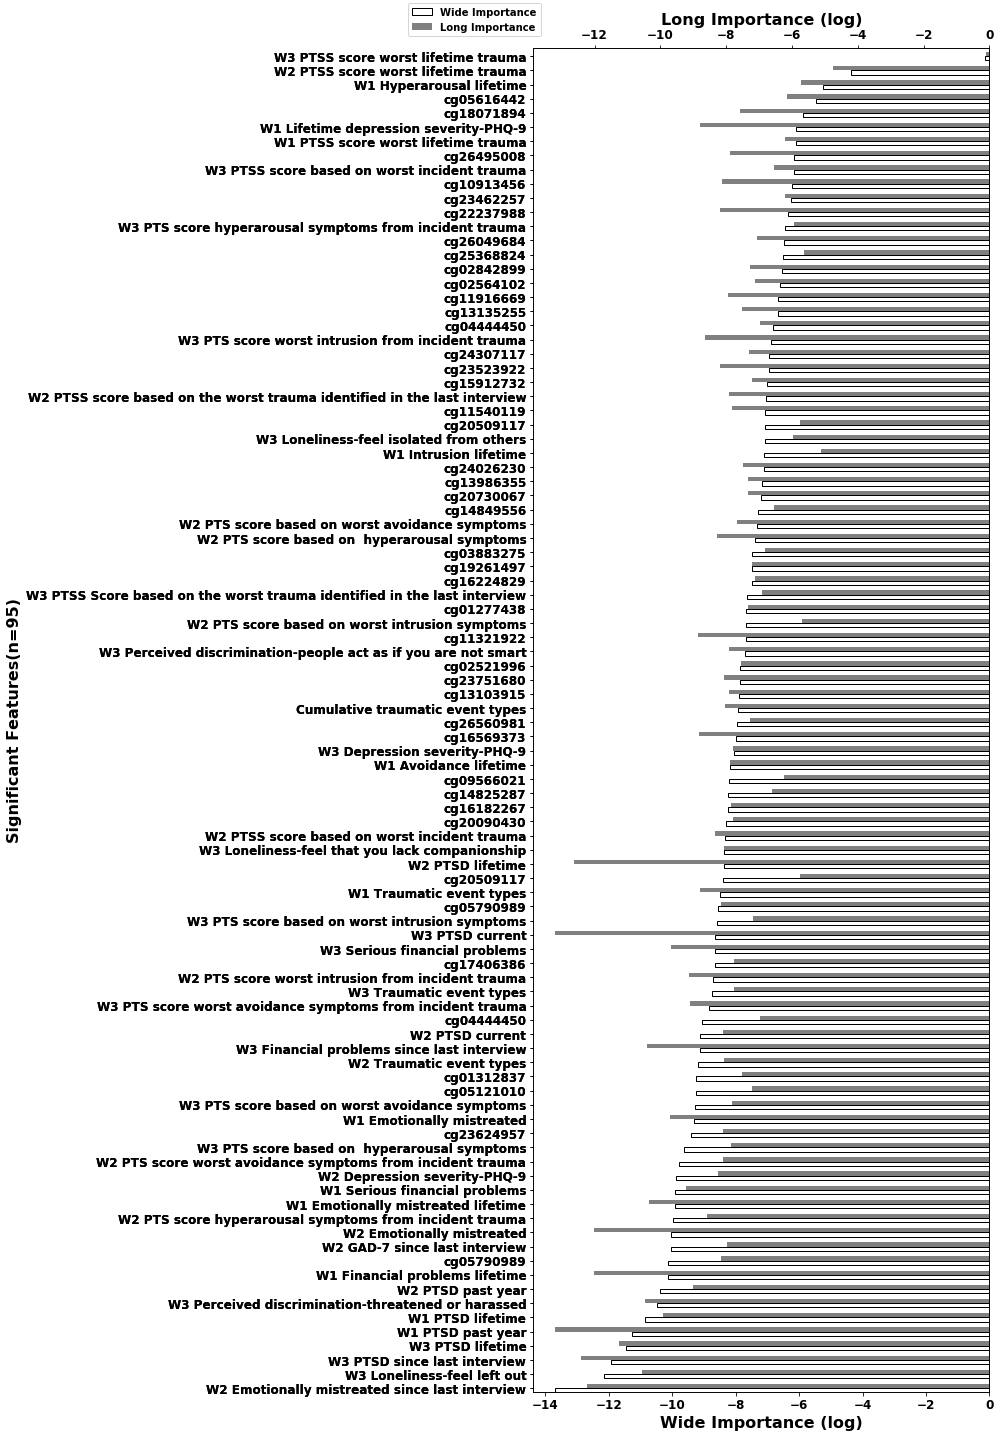

In [218]:
# Lets merge the common features (both cpgs and phenotypes) in cros and long
pheno_comn = pd.merge(common_features.T, fea_df_cros.T, 
                      left_index=True, right_index=True, how='inner')
pheno_comn.columns = ['Wide Importance','Long Importance']
pheno_comn_log = (np.log(pheno_comn.astype(float))).replace(-np.inf, 0)

pheno_comn = pheno_comn.reset_index().rename(columns =
                                       {pheno_comn.index.name:'Pheno'})

pheno_comn_log = pheno_comn_log.sort_values(by=['Wide Importance','Long Importance'], 
                                                  ascending = True)
del pheno_comn_log.index.name # remove the index

BarPlot(pheno_comn_log)



In [158]:
common_final

IlmnID                                  UCSC_RefGene_Name  \
552016  cg05616442                                     AKT1;AKT1;AKT1   
11053   cg18071894                                     AKT1;AKT1;AKT1   
610646  cg26495008                            FKBP5;FKBP5;FKBP5;FKBP5   
32385   cg10913456          FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5   
597111  cg23462257                                        NFKB1;NFKB1   
523488  cg22237988                                    BAX;BAX;BAX;BAX   
583447  cg26049684                                     AKT1;AKT1;AKT1   
569912  cg25368824                                            IL4;IL4   
664420  cg02842899           TP53;WRAP53;WRAP53;TP53;WRAP53;TP53;TP53   
484387  cg02564102                                            SMARCC1   
695402  cg11916669                                     AKT1;AKT1;AKT1   
797896  cg13135255                                      CREBBP;CREBBP   
739273  cg04444450                                              NCOA2   
101260  cg24307117                                          SPI1;SPI1   
787897  cg23523922                                                AFP   
272336  cg15912732                                     AKT1;AKT1;AKT1   
852645  cg11540119                                            SMARCC1   
124828  cg20509117                                      IL6;LOC541472   
701192  cg24026230                            NR3C1;NR3C1;NR3C1;NR3C1   
287974  cg13986355                                     AKT1;AKT1;AKT1   
711855  cg20730067                                        NFKB1;NFKB1   
480560  cg14849556                                  NCOA1;NCOA1;NCOA1   
829380  cg03883275                            MAPK8;MAPK8;MAPK8;MAPK8   
179647  cg19261497                           MDM2;MDM2;MDM2;MDM2;MDM2   
648599  cg16224829                                  NR3C1;NR3C1;NR3C1   
561155  cg01277438                               NFATC1;NFATC1;NFATC1   
154633  cg11321922  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...   
472330  cg02521996                                  MAPK3;MAPK3;MAPK3   
860522  cg23751680  SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA...   
159303  cg13103915                                               CSF2   
295863  cg26560981                               MAPK10;MAPK10;MAPK10   
532135  cg16569373                                      CREBBP;CREBBP   
7183    cg09566021                                      CREBBP;CREBBP   
822972  cg14825287                                     AKT1;AKT1;AKT1   
179209  cg16182267                        NFATC1;NFATC1;NFATC1;NFATC1   
481289  cg20090430                                        GSK3B;GSK3B   
124828  cg20509117                                      IL6;LOC541472   
235877  cg05790989                                             POU2F1   
49170   cg17406386  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...   
739273  cg04444450                                              NCOA2   
704462  cg01312837                                      CREBBP;CREBBP   
99127   cg05121010                               POU2F1;POU2F1;POU2F1   
377035  cg23624957                                              HDAC2   
235877  cg05790989                                             POU2F1   

       Wide Importance Long Importance  
552016        0.004177        0.002123  
11053         0.002806        0.000515  
610646        0.002126        0.000373  
32385         0.001958        0.000295  
597111        0.001897        0.001989  
523488        0.001750        0.000278  
583447        0.001532        0.000848  
569912        0.001470        0.003563  
664420        0.001444        0.000694  
484387        0.001369        0.000805  
695402        0.001273        0.000357  
797896        0.001265        0.000541  
739273        0.001099        0.000937  
101260        0.000969        0.000681  
787897        0.000951        0.000277  
272336        0.000913        0.000735  
852645        0.000856       

In [241]:
def unique_gene_list(col, sep):
    genes = [i.split(sep) for i in col.to_list()]
    flat_ls = [item for sublist in genes for item in sublist]
    print(len(set(flat_ls)))
    
unique_gene_list(col = common_final["UCSC_RefGene_Name"], sep = ";")

27


In [265]:
genes = [i.split(";") for i in common_final["UCSC_RefGene_Name"].to_list()]
flat_ls = [item for sublist in genes for item in sublist ]
len(set(flat_ls))

27

In [268]:
set(flat_ls)


{'AFP',
 'AKT1',
 'BAX',
 'CREBBP',
 'CSF2',
 'FKBP5',
 'GSK3B',
 'HDAC2',
 'IL4',
 'IL6',
 'LOC541472',
 'MAPK10',
 'MAPK3',
 'MAPK8',
 'MDM2',
 'NCOA1',
 'NCOA2',
 'NFATC1',
 'NFKB1',
 'NR1I3',
 'NR3C1',
 'POU2F1',
 'SMARCA4',
 'SMARCC1',
 'SPI1',
 'TP53',
 'WRAP53'}

In [171]:
gene_lis = common_final.loc[common_final["UCSC_RefGene_Name"].isin(pheno_comn_log.iloc[80:95, :].index)]
gene_lis

Empty DataFrame
Columns: [IlmnID, UCSC_RefGene_Name, Wide Importance, Long Importance]
Index: []

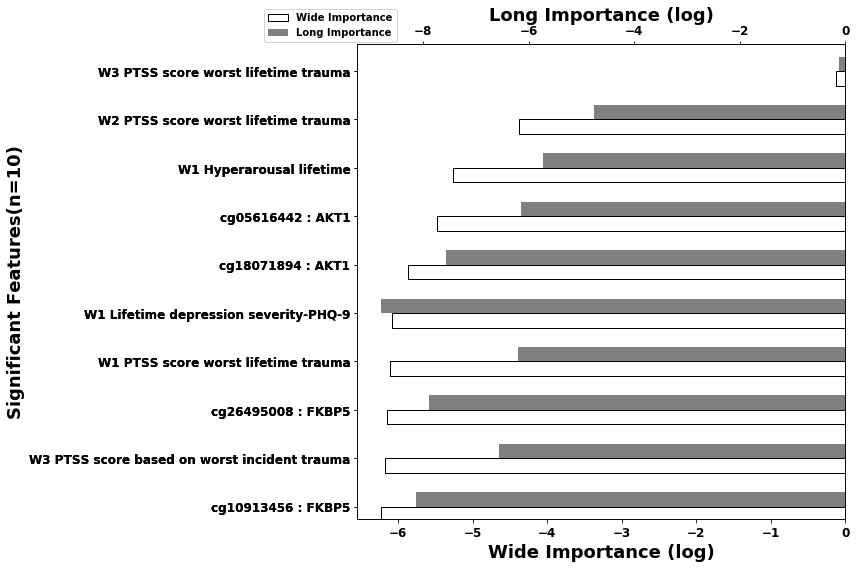

In [212]:
# Making plot for only top features for presentation slides
top_10 = pd.read_csv("E:/Machine Learning/Output Data/Top_10_common_features1.csv", index_col=0)
BarPlot(top_10)

In [170]:
import os
os.getcwd
pheno_comn_log.iloc[85:95, : ].to_csv("E:/Machine Learning/Output Data/Top_10_common_features.csv")


In [67]:
len(pheno_comn_log.index.unique())


92

In [64]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
common_pheno_comb = pd.merge(common_pheno, fea_df_cros.T, 
                             left_index=True, right_index=True, how='inner')
common_pheno_comb.columns = ['Long Importance','Cros Importance']
common_pheno_comb = common_pheno_comb.sort_values(by=['Long Importance','Cros Importance'], 
                                                  ascending = False)
common_pheno_comb = common_pheno_comb.reset_index().rename(columns =
                                       {common_pheno_comb.index.name:'Pheno'})
common_pheno_comb

Pheno Long Importance  \
0                 W3 PTSS score worst lifetime trauma        0.882080   
1                 W2 PTSS score worst lifetime trauma        0.012572   
2                            W1 Hyperarousal lifetime        0.005193   
3               W1 Lifetime depression severity-PHQ-9        0.002276   
4                 W1 PTSS score worst lifetime trauma        0.002213   
5        W3 PTSS score based on worst incident trauma        0.002076   
6   W3 PTS score hyperarousal symptoms from incide...        0.001610   
7   W3 PTS score worst intrusion from incident trauma        0.001011   
8   W2 PTSS score based on the worst trauma identi...        0.000871   
9             W3 Loneliness-feel isolated from others        0.000838   
10                              W1 Intrusion lifetime        0.000829   
11     W2 PTS score based on worst avoidance symptoms        0.000666   
12       W2 PTS score based on  hyperarousal symptoms        0.000621   
13  W3 PTSS Score based on the worst trauma identi...        0.000475   
14     W2 PTS score based on worst intrusion symptoms        0.000466   
15  W3 Perceived discrimination-people act as if y...        0.000453   
16                   Cumulative traumatic event types        0.000363   
17                       W3 Depression severity-PHQ-9        0.000316   
18                              W1 Avoidance lifetime        0.000283   
19       W2 PTSS score based on worst incident trauma        0.000237   
20     W3 Loneliness-feel that you lack companionship        0.000232   
21                                   W2 PTSD lifetime        0.000229   
22                           W1 Traumatic event types        0.000207   
23     W3 PTS score based on worst intrusion symptoms        0.000186   
24                                    W3 PTSD current        0.000176   
25                      W3 Serious financial problems        0.000175   
26  W2 PTS score worst intrusion from incident trauma        0.000166   
27                           W3 Traumatic event types        0.000158   
28  W3 PTS score worst avoidance symptoms from inc...        0.000143   
29                                    W2 PTSD current        0.000110   
30         W3 Financial problems since last interview        0.000108   
31                           W2 Traumatic event types        0.000103   
32     W3 PTS score based on worst avoidance symptoms        0.000092   
33                          W1 Emotionally mistreated        0.000091   
34       W3 PTS score based on  hyperarousal symptoms        0.000066   
35  W2 PTS score worst avoidance symptoms from inc...        0.000056   
36                       W2 Depression severity-PHQ-9        0.000051   
37                      W1 Serious financial problems        0.000050   
38                 W1 Emotionally mistreated lifetime        0.000049   
39  W2 PTS score hyperarousal symptoms from incide...        0.000047   
40                          W2 Emotionally mistreated        0.000044   
41                      W2 GAD-7 since last interview        0.000043   
42                     W1 Financial problems lifetime        0.000039   
43                                  W2 PTSD past year        0.000031   
44  W3 Perceived discrimination-threatened or hara...        0.000028   
45                                   W1 PTSD lifetime        0.000019   
46                                  W1 PTSD past year        0.000013   
47                                   W3 PTSD lifetime        0.000011   
48                       W3 PTSD since last interview        0.000006   
49                        W3 Loneliness-feel left out        0.000005   
50     W2 Emotionally mistreated since last interview        0.000001   

   Cros Importance  
0         0.890103  
1         0.008550  
2         0.003260  
3         0.000150  
4         0.002032  
5         0.001418  
6         0.002646  
7         0.000176  
8         0.000369  
9         0.002551  
10        0.006026  

In [425]:
# write common cpgs to file
common_final.to_csv("E:/Machine Learning/Output Data/Epic Common Important Cpgs with importance score "+name_id+".csv", index=False)

In [74]:
# Common phenotypes with mean
pheno_mean = pd.DataFrame(common_pheno_comb.iloc[:, 1:].mean(axis=1), columns=['Mean'])
common_pheno_mean = pd.concat([common_pheno_comb, pheno_mean], axis=1)
common_pheno_mean = common_pheno_mean.sort_index(by = ['Mean'], ascending = False)
common_pheno_mean

C:\Users\ahwani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


Pheno Long Importance  \
0                 W3 PTSS score worst lifetime trauma        0.882080   
1                 W2 PTSS score worst lifetime trauma        0.012572   
2                            W1 Hyperarousal lifetime        0.005193   
10                              W1 Intrusion lifetime        0.000829   
6   W3 PTS score hyperarousal symptoms from incide...        0.001610   
4                 W1 PTSS score worst lifetime trauma        0.002213   
14     W2 PTS score based on worst intrusion symptoms        0.000466   
5        W3 PTSS score based on worst incident trauma        0.002076   
9             W3 Loneliness-feel isolated from others        0.000838   
3               W1 Lifetime depression severity-PHQ-9        0.002276   
13  W3 PTSS Score based on the worst trauma identi...        0.000475   
8   W2 PTSS score based on the worst trauma identi...        0.000871   
7   W3 PTS score worst intrusion from incident trauma        0.001011   
11     W2 PTS score based on worst avoidance symptoms        0.000666   
23     W3 PTS score based on worst intrusion symptoms        0.000186   
12       W2 PTS score based on  hyperarousal symptoms        0.000621   
15  W3 Perceived discrimination-people act as if y...        0.000453   
17                       W3 Depression severity-PHQ-9        0.000316   
16                   Cumulative traumatic event types        0.000363   
18                              W1 Avoidance lifetime        0.000283   
27                           W3 Traumatic event types        0.000158   
20     W3 Loneliness-feel that you lack companionship        0.000232   
32     W3 PTS score based on worst avoidance symptoms        0.000092   
19       W2 PTSS score based on worst incident trauma        0.000237   
34       W3 PTS score based on  hyperarousal symptoms        0.000066   
31                           W2 Traumatic event types        0.000103   
29                                    W2 PTSD current        0.000110   
41                      W2 GAD-7 since last interview        0.000043   
35  W2 PTS score worst avoidance symptoms from inc...        0.000056   
22                           W1 Traumatic event types        0.000207   
36                       W2 Depression severity-PHQ-9        0.000051   
26  W2 PTS score worst intrusion from incident trauma        0.000166   
28  W3 PTS score worst avoidance symptoms from inc...        0.000143   
25                      W3 Serious financial problems        0.000175   
39  W2 PTS score hyperarousal symptoms from incide...        0.000047   
21                                   W2 PTSD lifetime        0.000229   
24                                    W3 PTSD current        0.000176   
43                                  W2 PTSD past year        0.000031   
33                          W1 Emotionally mistreated        0.000091   
37                      W1 Serious financial problems        0.000050   
30         W3 Financial problems since last interview        0.000108   
38                 W1 Emotionally mistreated lifetime        0.000049   
45                                   W1 PTSD lifetime        0.000019   
44  W3 Perceived discrimination-threatened or hara...        0.000028   
40                          W2 Emotionally mistreated        0.000044   
42                     W1 Financial problems lifetime        0.000039   
49                        W3 Loneliness-feel left out        0.000005   
47                                   W3 PTSD lifetime        0.000011   
46                                  W1 PTSD past year        0.000013   
48                       W3 PTSD since last interview        0.000006   
50     W2 Emotionally mistreated since last interview        0.000001   

   Cros Importance     Mean  
0         0.890103 0.886091  
1         0.008550 0.010561  
2         0.003260 0.004226  
10        0.006026 0.003427  
6         0.002646 0.002128  
4         0.002032 0.002122  
14        0.003358 0.001912  
5         0

In [69]:
# Now we will get these  common cpgs and pull out the expression values 
# and draw correlation 
common_cpgs_meth = dfs_final[2].loc[:, dfs_final[2].columns.str.contains('|'.join(common_final['IlmnID']))]
common_cpgs_meth

cg18071894  cg10913456  cg20509117  cg16182267  cg15912732  cg02564102  \
0      0.511900    0.015600    0.776200    0.923300    0.918800    0.017700   
2      0.428500    0.012900    0.732900    0.939400    0.917200    0.013200   
5      0.443000    0.016700    0.717200    0.944500    0.915500    0.014500   
6      0.428800    0.017400    0.617300    0.930800    0.953100    0.014900   
11     0.460400    0.013900    0.653200    0.933500    0.916000    0.014300   
..          ...         ...         ...         ...         ...         ...   
440    0.353700    0.014600    0.775600    0.930500    0.900500    0.016200   
441    0.430900    0.018400    0.821000    0.942900    0.909900    0.017400   
442    0.407500    0.014000    0.693000    0.932500    0.909200    0.015600   
444    0.500600    0.015700    0.705400    0.946000    0.922200    0.012100   
447    0.421800    0.014800    0.713700    0.916700    0.927600    0.016200   

     cg22237988  cg26049684  cg24026230  cg09566021  cg17406386  cg05121010  \
0      0.928300    0.224300    0.034100    0.767400    0.799700    0.717400   
2      0.911100    0.186300    0.045500    0.751100    0.791400    0.705200   
5      0.925400    0.121700    0.034700    0.708900    0.796600    0.736700   
6      0.933200    0.208200    0.039200    0.817900    0.763300    0.654600   
11     0.946800    0.228400    0.032000    0.799500    0.803700    0.779700   
..          ...         ...         ...         ...         ...         ...   
440    0.932900    0.096800    0.033200    0.726400    0.758600    0.673800   
441    0.926200    0.112200    0.038000    0.828400    0.784200    0.745600   
442    0.928900    0.127100    0.034100    0.791600    0.772500    0.690300   
444    0.937200    0.207400    0.039800    0.741900    0.796500    0.734500   
447    0.915100    0.139700    0.034500    0.767000    0.733000    0.766000   

     cg24307117  cg11321922  cg13103915  cg19261497  cg05790989  cg13986355  \
0      0.871200    0.504700    0.545600    0.625400    0.634600    0.627300   
2      0.847500    0.479300    0.587400    0.643300    0.620700    0.604600   
5      0.880300    0.519100    0.597400    0.705000    0.668100    0.567000   
6      0.873100    0.471400    0.563500    0.604900    0.591000    0.586900   
11     0.858100    0.493800    0.508400    0.679200    0.660400    0.620400   
..          ...         ...         ...         ...         ...         ...   
440    0.855300    0.498800    0.593300    0.637700    0.540800    0.556100   
441    0.877900    0.544700    0.595500    0.710200    0.708400    0.647100   
442    0.858200    0.487000    0.603700    0.590000    0.555900    0.627900   
444    0.853100    0.526300    0.601800    0.585000    0.670100    0.600500   
447    0.881600    0.453200    0.536000    0.697600    0.540500    0.549600   

     cg26560981  cg23624957  cg02521996  cg14849556  cg20090430  cg16569373  \
0      0.916000    0.708500    0.038000    0.863900    0.224500    0.626000   
2      0.889300    0.714200    0.029600    0.867700    0.158600    0.577600   
5      0.921100    0.700100    0.039800    0.845400    0.173100    0.602200   
6      0.901300    0.694400    0.034900    0.859800    0.168900    0.568200   
11     0.905100    0.698300    0.030500    0.811500    0.190800    0.621400   
..          ...         ...         ...         ...         ...         ...   
440    0.928000    0.623300    0.027000    0.820700    0.162700    0.548500   
441    0.904300    0.737600    0.039300    0.849800    0.198100    0.603100   
442    0.913700    0.719100    0.035900    0.831000    0.150600    0.580700   
444    0.927600    0.694900    0.029300    0.836000    0.211800    0.612800   
447    0.898700    0.653000    0.033400    0.844700    0.156400    0.525400   

     cg05616442  cg01277438  cg25368824  cg23462257  cg26495008  cg16224829  \
0      0.246000    0.449000    0.803800    0.144000    0.921600    0.737500   
2      0.188200    0.396800    0.827600    0.136300

In [194]:
import seaborn as sns
figure(num=None, figsize=(30, 30), dpi=400, facecolor='w', edgecolor='k')
# imp_cpgs = dfs_final[2].loc[:,dfs_final[2].columns.str.contains('^cg')]
sns.set(font_scale=2.5)
imp_cpgs = dfs_final[2].loc[:, dfs_final[2].columns.str.contains('|'.join(common_final['IlmnID']))]
cor = imp_cpgs.corr()
sns.heatmap(cor, annot=None, cmap="YlGnBu")
plt.xticks(rotation=70, ha='right')
plt.show()

C:\Users\ahwani\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [552]:
cor

cg18071894  cg10913456  cg20509117  cg15135914  cg15912732  \
cg18071894      1.0000      0.1546      0.1913      0.0895      0.2798   
cg10913456      0.1546      1.0000      0.0153      0.1466      0.0343   
cg20509117      0.1913      0.0153      1.0000      0.1189      0.1776   
cg15135914      0.0895      0.1466      0.1189      1.0000      0.1024   
cg15912732      0.2798      0.0343      0.1776      0.1024      1.0000   
cg02564102      0.0353      0.0804      0.0454      0.0551     -0.0251   
cg22237988      0.1751      0.1591      0.0854     -0.0577      0.1428   
cg26049684      0.7891      0.1184      0.1200      0.0929      0.1808   
cg24026230      0.1932      0.1297      0.1607      0.2105      0.1402   
cg12377972      0.1540      0.1129      0.0872      0.0810      0.1025   
cg17406386      0.2972      0.1374      0.0945      0.1122      0.2617   
cg05121010      0.3943      0.1830      0.1901      0.0901      0.3681   
cg11321922      0.3741      0.1709      0.0486      0.0708      0.1901   
cg19261497      0.3039      0.1727      0.1742      0.1318      0.2998   
cg05790989      0.4235      0.1733      0.1784      0.0392      0.2896   
cg13986355      0.2474      0.1671      0.1840      0.1021      0.3483   
cg26560981     -0.0992     -0.1704     -0.1064     -0.1568     -0.0401   
cg23624957      0.4053      0.1739      0.1725      0.0498      0.3160   
cg14849556      0.3384      0.0750      0.1671      0.0885      0.2723   
cg20090430      0.3821      0.1635      0.0349      0.0388      0.1879   
cg02736255      0.2868      0.1313      0.1867      0.0204      0.2314   
cg16569373      0.4258      0.0816      0.1608      0.0815      0.2606   
cg05616442      0.8910      0.1856      0.1173      0.0569      0.2810   
cg21583111      0.2953      0.1336      0.1519      0.0879      0.1607   
cg01277438      0.3820      0.1588      0.1008      0.0578      0.2447   
cg25368824      0.3830      0.1477      0.2896      0.1316      0.3810   
cg16224829      0.1076      0.1522      0.1963      0.0256      0.2115   
cg18149011      0.1452      0.0972      0.0177     -0.0557      0.0282   
cg11916669      0.9218      0.1726      0.1519      0.0752      0.3016   
cg19645788      0.4145      0.1128      0.0852      0.1761      0.2990   
cg04444450      0.3362      0.2126      0.1164      0.0948      0.2016   
cg13135255      0.0063     -0.0022      0.1416      0.0554      0.1668   
cg14825287      0.8641      0.1755      0.1817      0.0825      0.3254   
cg03883275      0.2887      0.1914      0.0791      0.0398      0.2336   
cg12346404      0.1739      0.1985      0.1275      0.2001      0.0513   
cg11540119      0.1515      0.1536      0.0442     -0.0103      0.1618   

            cg02564102  cg22237988  cg26049684  cg24026230  cg12377972  \
cg18071894      0.0353      0.1751      0.7891      0.1932      0.1540   
cg10913456      0.0804      0.1591      0.1184      0.1297      0.1129   
cg20509117      0.0454      0.0854      0.1200      0.1607      0.0872   
cg15135914      0.0551     -0.0577      0.0929      0.2105      0.0810   
cg15912732     -0.0251      0.1428      0.1808      0.1402      0.1025   
cg02564102      1.0000     -0.1044      0.0312      0.1017      0.0995   
cg22237988     -0.1044      1.0000      0.1103     -0.0419      0.1509   
cg26049684      0.0312      0.1103      1.0000      0.2453      0.0511   
cg24026230      0.1017     -0.0419      0.2453      1.0000      0.0128   
cg12377972      0.0995      0.1509      0.0511      0.0128      1.0000   
cg17406386      0.0415      0.2262      0.2548      0.2245     -0.1594   
cg05121010      0.0784      0.1778      0.3580      0.1764     -0.0049   
cg11321922      0.1134      0.3010      0.2579      0.1243     -0.0166   
cg19261497      0.1524      0.0514      0.2719      0.1263      0.1240   
cg05790989      0.1181      0.2024      0.3248      0.1542     -0.0622   
cg13986355      0.0248      0.2252      0.2091      0.0765      0.1087   
cg26560981     

In [253]:
# get gene information about unique genes
# In long and wide

cros_annot =  manifest1.loc[manifest1['IlmnID'].isin(fea_df_cros.T.index)]
cros_annot
unique_gene_list(col = cros_annot["UCSC_RefGene_Name"], sep = ";")


41


In [259]:
import re
pattern = ["_1$", "_2$"]
wide_fea = fea_df_long.rename(columns=lambda x: re.sub('|'.join(pattern), '', x))

long_annot = manifest1.loc[manifest1['IlmnID'].isin(wide_fea.T.index)]
long_annot
unique_gene_list(col = long_annot["UCSC_RefGene_Name"], sep = ";")

49


In [281]:
# long/cros features sorted based on importance 
long_sorted = fea_df_cros.T.sort_values(by = [1], ascending=False)
long_sorted.to_csv("E:/Machine Learning/Output Data/Long_features_wd_importance.csv")

In [282]:
wide_sorted = fea_df_long.T.sort_values(by = [1], ascending=False)
wide_sorted.to_csv("E:/Machine Learning/Output Data/Wide_features_wd_importance.csv")

In [287]:
pd.set_option('display.max_rows', 100)
cros_annot[["IlmnID", "UCSC_RefGene_Name"]]

IlmnID                                  UCSC_RefGene_Name
7183    cg09566021                                      CREBBP;CREBBP
10609   cg13301722                                   CDK5;CDK5;SLC4A2
11053   cg18071894                                     AKT1;AKT1;AKT1
13873   cg12828331                                              VIPR1
13907   cg05359963                                              TBX21
21363   cg15900987                                              BGLAP
25533   cg12377972                                    IL4;IL4;IL4;IL4
32385   cg10913456          FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5
37216   cg02072813                                     AKT1;AKT1;AKT1
49170   cg17406386  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...
88489   cg03025248                                               SELE
99127   cg05121010                               POU2F1;POU2F1;POU2F1
101260  cg24307117                                          SPI1;SPI1
124828  cg20509117                                      IL6;LOC541472
154633  cg11321922  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...
159303  cg13103915                                               CSF2
160941  cg12411068                            SMARCA4;SMARCA4;SMARCA4
174788  cg05287944  PRKACB;PRKACB;PRKACB;PRKACB;PRKACB;PRKACB;PRKA...
179209  cg16182267                        NFATC1;NFATC1;NFATC1;NFATC1
179647  cg19261497                           MDM2;MDM2;MDM2;MDM2;MDM2
204834  cg10628062                                  NCOA1;NCOA1;NCOA1
230239  cg15135914                                          RELA;RELA
235877  cg05790989                                             POU2F1
239996  cg00395632                                             MAPK11
266172  cg10290474                                     AKT1;AKT1;AKT1
272336  cg15912732                                     AKT1;AKT1;AKT1
287974  cg13986355                                     AKT1;AKT1;AKT1
295863  cg26560981                               MAPK10;MAPK10;MAPK10
320645  cg04069932                                              NR4A1
334185  cg15899972                                             STAT5B
351335  cg12424293                        NFATC1;NFATC1;NFATC1;NFATC1
377035  cg23624957                                              HDAC2
408765  cg05265849                                                IL6
417855  cg14678830                                        GSK3B;GSK3B
423012  cg16308790                 NFATC1;NFATC1;NFATC1;NFATC1;NFATC1
472330  cg02521996                                  MAPK3;MAPK3;MAPK3
480560  cg14849556                                  NCOA1;NCOA1;NCOA1
481289  cg20090430                                        GSK3B;GSK3B
484387  cg02564102                                            SMARCC1
514917  cg10100767                                     AKT1;AKT1;AKT1
518287  cg02736255                 NFATC1;NFATC1;NFATC1;NFATC1;NFATC1
523488  cg22237988                                    BAX;BAX;BAX;BAX
524014  cg26023960                                     AKT1;AKT1;AKT1
532135  cg16569373                                      CREBBP;CREBBP
552016  cg05616442                                     AKT1;AKT1;AKT1
553555  cg15185458                                              VIPR1
554732  cg21583111                                        NFKB1;NFKB1
561155  cg01277438                               NFATC1;NFATC1;NFATC1
562352  cg12036877                                              BGLAP
569912  cg25368824                                            IL4;IL4
583447  cg26049684                                     AKT1;AKT1;AKT1
587077  cg05753993                 NFATC1;NFATC1;NFATC1;NFATC1;NFATC1
597111  cg23462257                                        NFKB1;NFKB1
610646  cg26495008                            FKBP5;FKBP5;FKBP5;FKBP5
620741  cg16521633  SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA4;SMARCA...
648599  cg16224829                                  NR3C1;NR3C1;NR3C1
663986  cg18149011    

In [288]:
long_annot[["IlmnID", "UCSC_RefGene_Name"]]

IlmnID                                  UCSC_RefGene_Name
2491    cg26081259  NR3C1;NR3C1;NR3C1;NR3C1;NR3C1;NR3C1;NR3C1;NR3C...
7183    cg09566021                                      CREBBP;CREBBP
8063    cg19301882                        MAPK14;MAPK14;MAPK14;MAPK14
11053   cg18071894                                     AKT1;AKT1;AKT1
32385   cg10913456          FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5;FKBP5
41553   cg13250001                                        GSK3B;GSK3B
46550   cg26490845  NFATC1;NFATC1;NFATC1;NFATC1;NFATC1;NFATC1;NFAT...
49170   cg17406386  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...
49767   cg10874403                                      POU1F1;POU1F1
63748   cg05891054                                             STAT5B
74826   cg15322876                                               KRT5
83949   cg17102627                        NFATC1;NFATC1;NFATC1;NFATC1
84775   cg18068862                            YWHAH;C22orf24;C22orf24
99127   cg05121010                               POU2F1;POU2F1;POU2F1
101260  cg24307117                                          SPI1;SPI1
124828  cg20509117                                      IL6;LOC541472
132169  cg07474652                                            SMARCC1
141789  cg12220605                                             STAT5B
143652  cg23204518                                          PCK2;PCK2
154633  cg11321922  NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I3;NR1I...
158646  cg16235088                      MAPK9;MAPK9;MAPK9;MAPK9;MAPK9
159303  cg13103915                                               CSF2
168428  cg02015261                                           HSP90AA1
177114  cg06317056                  TP53;WRAP53;WRAP53;TP53;TP53;TP53
177684  cg12726835                                              NCOA2
179209  cg16182267                        NFATC1;NFATC1;NFATC1;NFATC1
179647  cg19261497                           MDM2;MDM2;MDM2;MDM2;MDM2
190156  cg16586394          NR3C1;NR3C1;NR3C1;NR3C1;NR3C1;NR3C1;NR3C1
201417  cg06952416          NR3C1;NR3C1;NR3C1;NR3C1;NR3C1;NR3C1;NR3C1
221563  cg07140176                         SUV420H1;SUV420H1;SUV420H1
235877  cg05790989                                             POU2F1
272336  cg15912732                                     AKT1;AKT1;AKT1
274595  cg19210352                                      CREBBP;CREBBP
287974  cg13986355                                     AKT1;AKT1;AKT1
295863  cg26560981                               MAPK10;MAPK10;MAPK10
299926  cg12405139                                        GATA3;GATA3
327998  cg25410123                                               IRF1
335122  cg08499107                                             PRKACA
377035  cg23624957                                              HDAC2
377452  cg20655113                                          SGK1;SGK1
405812  cg25977304                                             POU2F1
472330  cg02521996                                  MAPK3;MAPK3;MAPK3
474130  cg18361915                        MAPK14;MAPK14;MAPK14;MAPK14
480435  cg10300814                            FKBP5;FKBP5;FKBP5;FKBP5
480560  cg14849556                                  NCOA1;NCOA1;NCOA1
481289  cg20090430                                        GSK3B;GSK3B
484387  cg02564102                                            SMARCC1
484592  cg12912785                                             TSG101
485115  cg01192746                      MAPK9;MAPK9;MAPK9;MAPK9;MAPK9
494863  cg22809078                            SMARCA4;SMARCA4;SMARCA4
508163  cg20405918                                    SMARCD1;SMARCD1
508955  cg17919020                                   CDK5;CDK5;SLC4A2
523488  cg22237988                                    BAX;BAX;BAX;BAX
523834  cg13047822                                      PRKACB;PRKACB
532135  cg16569373                                      CREBBP;CREBBP
538011  cg00540551                                        KRT14;KRT14
552016  cg05616442    